# Purpose of this project: 
    
   Credit One has seen an increase in the number of customers who have defaulted on loans they have secured from various partners, and Credit One, as their credit scoring service, could risk losing business if the problem is not solved right away. The bottom line is they need a much better way to understand how much credit to allow someone to use. They have enlisted the help of our Data Science team to design and implement a creative, empirically sound solution.
    
    

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
import matplotlib.patches as mpatches

# Reports
import pandas_profiling

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#model metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

## Load data

#### CSV file has extra header. We should skip that and load the data into dataframe

In [2]:
# Use header=1 to skip the first row

data = pd.read_csv("default of credit card clients.csv",header=1)
data.head(5)

ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university         1   24      2      2     -1   
1   2     120000  female  university         2   26     -1      2      0   
2   3      90000  female  university         2   34      0      0      0   
3   4      50000  female  university         1   37      0      0      0   
4   5      50000    male  university         1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                     default  
1      1000         0      2000                     default  
2      1000      1000      5000                 not default  
3      1100      1069      1000                 not default  
4      9000       689       679                 not default  

[5 rows x 25 columns]

### Now the data is loaded properly into dataframe. Let's examine the data.

## Data Pre-processing and Analysis


1. Check the total number of rows and columns
2. Check the column names and index
3. Check the data types of all columns
4. Check for null and missing values in any of the columns
5. Check for duplicates in data
6. Check for inconsistencies in column names, rename if necesssary
7. Drop any irrelavant column from the dataframe
8. Descriptive statistics for all numerical columns to understand the data
9. Changes to data if necessary(aligned with business goals)
10. Visualization and statistics about each variable to understand it better- Can use Pandas Profiling Report
11. Univariate Analysis - Check the data distribution of each variable, unique values and counts of Categorical variables - histogram/count plot,fix unaccounted data
12. Bivariate Analysis- Check the relationship between target variable and other variables
13. Multivariate Analysis - Check the relationship between 2 or more variables.
14. Label encode or one hot encode the Categorical columns 
15. Correlation matrix between all columns to gain insight into data


### <span style='background :yellow' >1. Check the total number of rows and columns</span>

In [3]:
data.shape

(30000, 25)

### OBSERVATION: 

 There are 30,000 records and 25 columns

### <span style='background :yellow' >2. Check the column names and Index </span>

In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### OBSERVATION: 

There are 25 columns in the data source

### <span style='background :yellow' >3. Check the data types of all columns </span>

In [5]:
data.info()               # list all columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

### OBSERVATION: 

All the columns are non-null and 3 columns are Object data types. 

### <span style='background :yellow' > 4. Check for null and missing values in any of the columns </span>

In [6]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### OBSERVATION: 

There are no nulls/ missing values in  the data

### <span style='background :yellow' >5. Check for duplicates in data </span>

In [7]:
data.duplicated().sum()

0

### OBSERVATION: 
There are no duplicates

### <span style='background :yellow' > 6. Check for column name inconsistencies </span>

### Rename column names to be consistent and user friendly 

In [8]:
# SEX can be renamed as GENDER
# PAY_0 can be renamed to PAY_1
# default payment next month can be renamed as DEFAULT_STATUS

data.rename(columns = {'SEX': 'GENDER',
                       'PAY_0':'PAY_1',
                       'default payment next month': 'DEFAULT_STATUS'}, inplace = True) 

data


ID  LIMIT_BAL  GENDER    EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0          1      20000  female   university         1   24      2      2   
1          2     120000  female   university         2   26     -1      2   
2          3      90000  female   university         2   34      0      0   
3          4      50000  female   university         1   37      0      0   
4          5      50000    male   university         1   57     -1      0   
...      ...        ...     ...          ...       ...  ...    ...    ...   
29995  29996     220000    male  high school         1   39      0      0   
29996  29997     150000    male  high school         2   43     -1     -1   
29997  29998      30000    male   university         2   37      4      3   
29998  29999      80000    male  high school         1   41      1     -1   
29999  30000      50000    male   university         1   46      0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1     -1  ...          0          0          0         0       689   
1          0      0  ...       3272       3455       3261         0      1000   
2          0      0  ...      14331      14948      15549      1518      1500   
3          0      0  ...      28314      28959      29547      2000      2019   
4         -1      0  ...      20940      19146      19131      2000     36681   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995      0      0  ...      88004      31237      15980      8500     20000   
29996     -1     -1  ...       8979       5190          0      1837      3526   
29997      2     -1  ...      20878      20582      19357         0         0   
29998      0      0  ...      52774      11855      48944     85900      3409   
29999      0      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT_STATUS  
0             0         0         0         0         default  
1          1000      1000         0      2000         default  
2          1000      1000      1000      5000     not default  
3          1200      1100      1069      1000     not default  
4         10000      9000       689       679     not default  
...         ...       ...       ...       ...             ...  
29995      5003      3047      5000      1000     not default  
29996      8998       129         0         0     not default  
29997     22000      4200      2000      3100         default  
29998      1178      1926     52964      1804         default  
29999      1430      1000      1000      1000         default  

[30000 rows x 25 columns]

### OBSERVATION:

PAY_0 is inconsistent, default payment next month not user friendly and hence renamed

### <span style='background :yellow' >7. Drop any irrelevent columns from the dataframe </span>

ID column is irrelevant to whether a customer will be default/ not default and therefore can be dropped

In [9]:
data.drop('ID', axis=1, inplace=True) # Drop column ID

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LIMIT_BAL       30000 non-null  int64 
 1   GENDER          30000 non-null  object
 2   EDUCATION       30000 non-null  object
 3   MARRIAGE        30000 non-null  int64 
 4   AGE             30000 non-null  int64 
 5   PAY_1           30000 non-null  int64 
 6   PAY_2           30000 non-null  int64 
 7   PAY_3           30000 non-null  int64 
 8   PAY_4           30000 non-null  int64 
 9   PAY_5           30000 non-null  int64 
 10  PAY_6           30000 non-null  int64 
 11  BILL_AMT1       30000 non-null  int64 
 12  BILL_AMT2       30000 non-null  int64 
 13  BILL_AMT3       30000 non-null  int64 
 14  BILL_AMT4       30000 non-null  int64 
 15  BILL_AMT5       30000 non-null  int64 
 16  BILL_AMT6       30000 non-null  int64 
 17  PAY_AMT1        30000 non-null  int64 
 18  PAY_AM

### OBSERVATION: 

ID column is irrelevant and dropped

### <span style='background :yellow' >8. Descriptive Statistics </span>

In [10]:
# Statistics for all numerical columns

data.describe()

LIMIT_BAL      MARRIAGE           AGE         PAY_1         PAY_2  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.551867     35.485500     -0.016700     -0.133767   
std     129747.661567      0.521970      9.217904      1.123802      1.197186   
min      10000.000000      0.000000     21.000000     -2.000000     -2.000000   
25%      50000.000000      1.000000     28.000000     -1.000000     -1.000000   
50%     140000.000000      2.000000     34.000000      0.000000      0.000000   
75%     240000.000000      2.000000     41.000000      0.000000      0.000000   
max    1000000.000000      3.000000     79.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169139      1.133187      1.149988   73635.860576   
min       -2.000000     -2.000000     -2.000000     -2.000000 -165580.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3558.750000   
50%        0.000000      0.000000      0.000000      0.000000   22381.500000   
75%        0.000000      0.000000      0.000000      0.000000   67091.000000   
max        8.000000      8.000000      8.000000      8.000000  964511.000000   

       ...     BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  ...  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   ...  4.701315e+04   43262.948967   40311.400967   38871.760400   
std    ...  6.934939e+04   64332.856134   60797.155770   59554.107537   
min    ... -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    ...  2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    ...  2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    ...  6.016475e+04   54506.000000   50190.500000   49198.250000   
max    ...  1.664089e+06  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 21 columns]

In [11]:
data ['GENDER'].describe()

count      30000
unique         2
top       female
freq       18112
Name: GENDER, dtype: object

In [12]:
data ['EDUCATION'].describe()

count          30000
unique             4
top       university
freq           14030
Name: EDUCATION, dtype: object

In [13]:
data ['DEFAULT_STATUS'].describe()

count           30000
unique              2
top       not default
freq            23364
Name: DEFAULT_STATUS, dtype: object

### OBSERVATION: 
1. 50% of the Customers are below 34 yrs of age
2. 50% of the Customers has a credit limit less than NT 140000 dollar
3. There are more female customers than male
4. There are less default customers than non default customers.
5. 50% of the customers have latest Outstanding amount of 22,381NT$

### <span style='background :yellow' >9. Make changes to data if necessary</span>

 Replace -2,-1 value in all payment status columns (PAY_1 to PAY_6) with 0.
 
 From business point of view, -2: No consumption; -1: Paid in full; 0: The use of revolving credit are all considered good/same and can be changed to 0. Otherwise, ML algorithms  may consider -2,-1 as bad. Values 1 to 8 are payment delays and need not be changed. 

In [14]:
Columns=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for i in range(len(Columns)):
    data[Columns[i]] = data[Columns[i]].replace(-2,0)
    data[Columns[i]]= data[Columns[i]].replace(-1,0)
    i=i+1
    

### OBSERVATION: 
-2,-1 values in all the repayment status columns are replaced with 0

### <span style='background :yellow' >10. Pandas Profiling Report</span>

In [15]:
#from pandas_profiling import ProfileReport
#data.profile_report()

## <span style='background :yellow' > 11. UNIVARIATE ANALYSIS: Check the data distribution of each feature </span>

### Categorical variables in our data are:

1. GENDER
2. MARRIAGE
3. EDUCATION
4. DEFAULT_STATUS
5. PAY_1 to PAY_6 columns

### Continuous features are

1. AGE
2. LIMIT_BAL
3. BILL_AMT1 to BILL_AMT6 columns
4. PAY_AMT1 to PAY_AMT6 columns

### Feature: GENDER

In [16]:
data['GENDER'].value_counts()

female    18112
male      11888
Name: GENDER, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Gender')

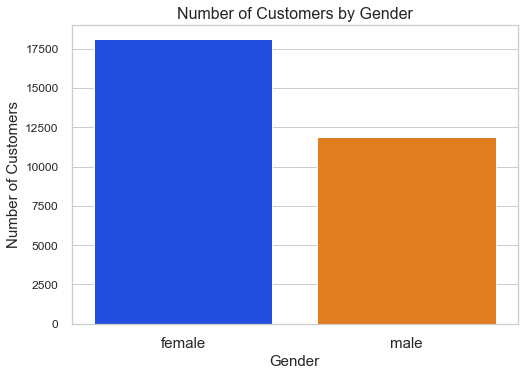

In [17]:
# Using Seaborn Countplot to Visualize the same

sns.set(style="whitegrid")
sns.countplot(x="GENDER",data =data, palette = 'bright')


# Configure X and Y axis
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)

# Set the title
plt.title('Number of Customers by Gender',fontsize=16)

### OBSERVATION: 

60% of the Customers are female (18112 females)

### Feature: MARRIAGE

In [18]:
# Make a copy of the dataframe and map the values to the corresponding meaning just to plot.
# Will use this dataframe only for plotting

marriage_data= data.copy()
marriage_data["MARRIAGE"].replace({1: "Married",
                                   2: "Single",
                                   3: "Divorced",
                                   0: "Others"}, inplace=True)
marriage_data['MARRIAGE'].value_counts()

Single      15964
Married     13659
Divorced      323
Others         54
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Marital status')

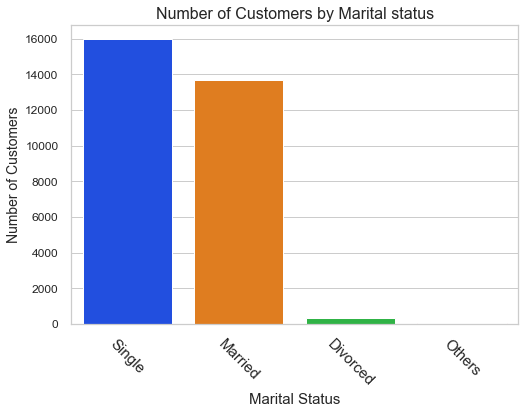

In [19]:
# To plot from highest to lowest
order = marriage_data['MARRIAGE'].value_counts().index

# Plotting in Seaborn
sns.set(style="whitegrid")
sns.countplot(x="MARRIAGE",data =marriage_data, palette="bright", order=order)

# Configure X and Y axis
plt.xticks(fontsize=15,rotation=-45)
plt.yticks(fontsize=12)
plt.xlabel("Marital Status", fontsize=15)
plt.ylabel("Number of Customers", fontsize=14)

# Set the title
plt.title('Number of Customers by Marital status',fontsize=16)

### OBSERVATION:
53.2% of the Customers are Single and 45% are married.

### Feature: EDUCATION

In [20]:
data['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Education')

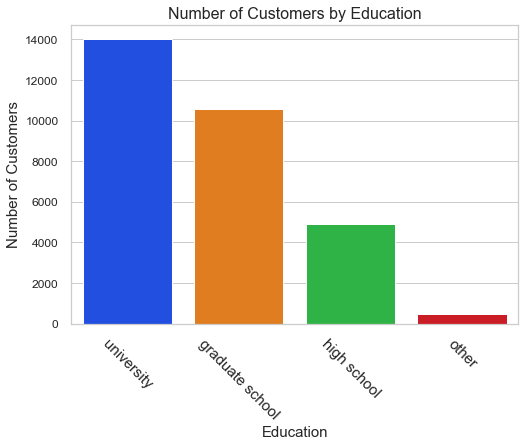

In [21]:
# Plot the chart
sns.countplot(x='EDUCATION',data=data, palette="bright")

# Configure X and Y axis
plt.xticks(fontsize=15,rotation=-45)
plt.yticks(fontsize=12)
plt.xlabel("Education", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)

# Set the title
plt.title('Number of Customers by Education',fontsize=16)

### OBSERVATION: 
46.76% of the Customers have studied at University, 35.28% are graduates 

### Feature: DEFAULT_STATUS

In [22]:
data['DEFAULT_STATUS'].value_counts()

not default    23364
default         6636
Name: DEFAULT_STATUS, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Default status')

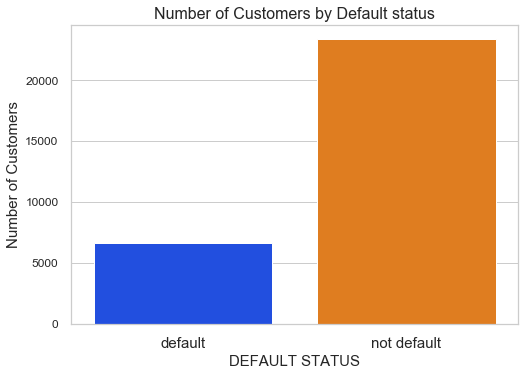

In [23]:
# Plot the chart
sns.countplot(x="DEFAULT_STATUS", data=data, palette="bright")

# Configure X and Y axis
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("DEFAULT STATUS", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)

# Set the title
plt.title('Number of Customers by Default status',fontsize=16)

### OBSERVATION: 
Only 22.12% of the Customers defaulted.  There are less default customers than non-default

### Feature: AGE

In [24]:
## Creating this dataframe to include a column for bin values. This dataframe will be used only for plotting

Age_count= data.copy()
Age_count['Age_group'] = pd.cut(x = Age_count['AGE'], bins = [20,30,40,50,60,70,80],
                                       labels = ['20-30', '31-40','41-50','51-60','61-70','71-80'])
Age_count['Age_group'].value_counts()

20-30    11013
31-40    10713
41-50     6005
51-60     1997
61-70      257
71-80       15
Name: Age_group, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Age')

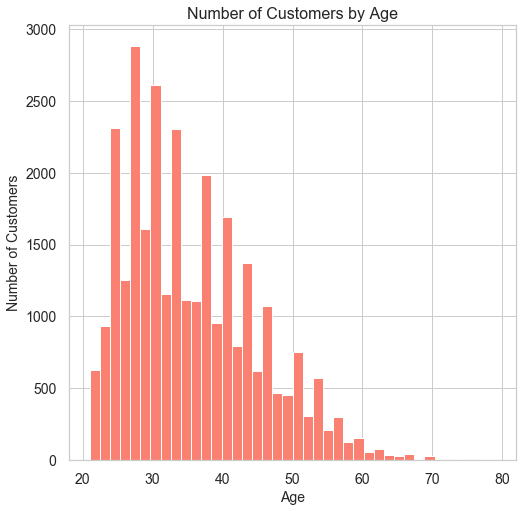

In [25]:
plt.figure(figsize=(8,8)) 

# Plot the chart
plt.hist(data['AGE'],color="Salmon",bins=40)

# Configure X and Y axis
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the title
plt.title("Number of Customers by Age", fontsize=16)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text yticklabel objects>)

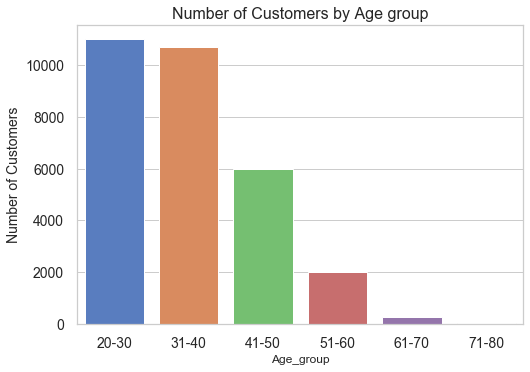

In [26]:
sns.set(style="whitegrid")
sns.countplot(x='Age_group',data=Age_count,palette='muted')

plt.title("Number of Customers by Age group", fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=0)
plt.yticks(fontsize=14)


### OBSERVATION: 

36.71% of the customers are between the age group 20-30.

Maximum number of customers are in age group 20-30 followed by 31-40

### Feature: LIMIT_BAL

Text(0.5, 1.0, 'Number of Customers by Credit limit')

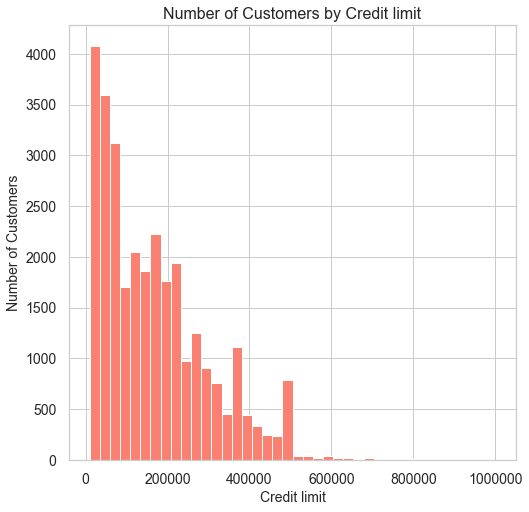

In [27]:
plt.figure(figsize=(8,8)) 

# Plot the graph
plt.hist(data['LIMIT_BAL'],color="Salmon",bins=40)

# Configure X and Y axis
plt.xlabel('Credit limit', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the title
plt.title("Number of Customers by Credit limit", fontsize=16)

In [28]:
# Creating this dataframe to add a column for binned values of Credit limit. This dataframe to be used only for plotting

limit_data= data.copy()
limit_data['Credit limit'] = pd.cut(x = limit_data['LIMIT_BAL'], bins = [0,50000,100000,150000,200000,300000,400000,500000,1000000],
                                       labels = ['0-50k','51k-100k','101k-150k','151-200k','200k-300k','300-400k','400-500k','500k-1000k'])
limit_data['Credit limit'].value_counts()

0-50k         7676
200k-300k     5059
51k-100k      4822
151-200k      3978
101k-150k     3902
300-400k      2759
400-500k      1598
500k-1000k     206
Name: Credit limit, dtype: int64

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 <a list of 10 Text yticklabel objects>)

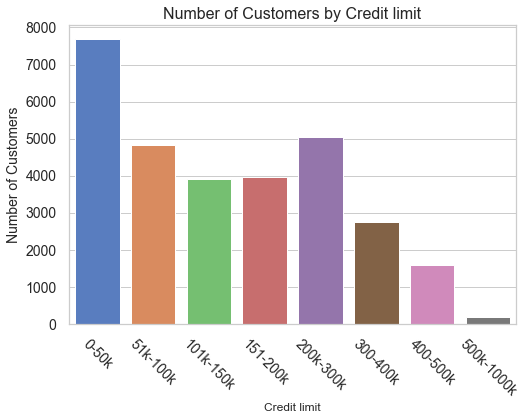

In [29]:
sns.set(style="whitegrid")

# Plotting the graph
sns.countplot(x='Credit limit',data=limit_data,palette='muted')

# Set x,y labels, title
plt.title("Number of Customers by Credit limit", fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=-45)
plt.yticks(fontsize=14)

### OBSERVATION:

25.5% of the customers have credit limit less than 50k

Maximum number of customers are under 50k credit liit followed by 200-300k and 51-100k

### Feature: PAY_1 to PAY_6 

Setting up 6 subplots for 6 columns

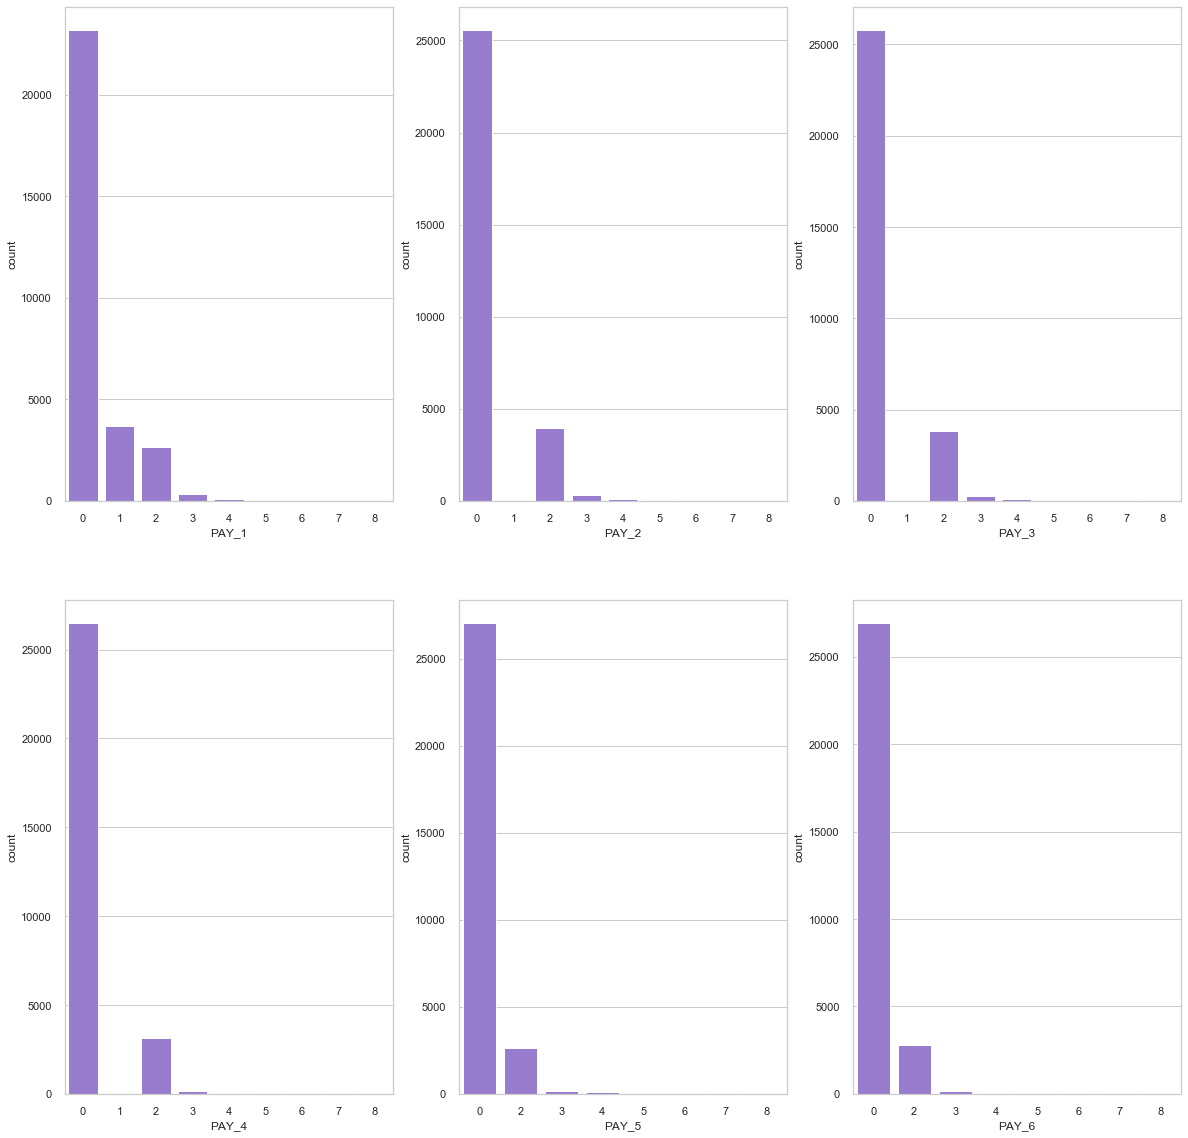

In [30]:
fig,ax = plt.subplots (2,3,figsize=(20,20))
sns.set(font_scale=1,style="white")

# Creating Subplots
sns.countplot(x= 'PAY_1', data=data, ax=ax[0,0],color='mediumpurple')
sns.countplot(x= 'PAY_2', data=data, ax=ax[0,1],color='mediumpurple')
sns.countplot(x= 'PAY_3', data=data, ax=ax[0,2],color='mediumpurple')
sns.countplot(x= 'PAY_4', data=data, ax=ax[1,0],color='mediumpurple')
sns.countplot(x= 'PAY_5', data=data, ax=ax[1,1],color='mediumpurple')
sns.countplot(x= 'PAY_6', data=data, ax=ax[1,2],color='mediumpurple')

### OBSERVATION: 

PAY_1 to PAY_6 has 0 as repayment status for most of the customers

### Feature: BILL_AMT1 to BILL_AMT6

6 Subplots for 6 months bill amount

Setting y axis to log scale as we have wide range of values for bill amount (y axis)

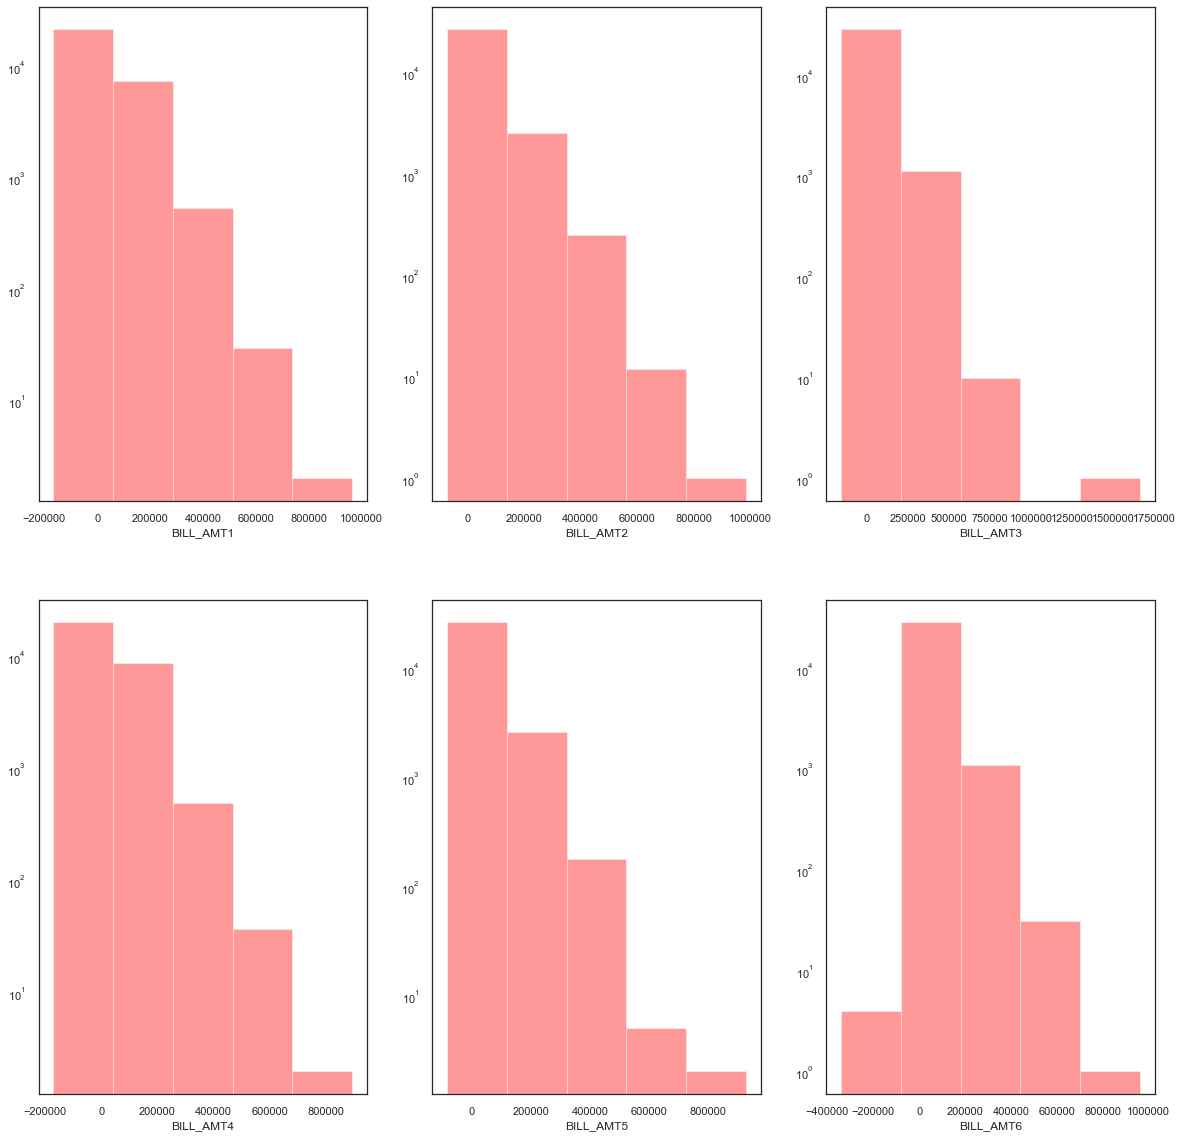

In [31]:
fig,ax = plt.subplots (2,3,figsize=(20,20)) 
sns.distplot(data['BILL_AMT1'],bins=5, kde=False, rug=False,color='red', ax=ax[0,0],hist_kws={'log':True})
sns.distplot(data['BILL_AMT2'],bins=5, kde=False, rug=False,color='red', ax=ax[0,1],hist_kws={'log':True})
sns.distplot(data['BILL_AMT3'],bins=5, kde=False, rug=False,color='red', ax=ax[0,2],hist_kws={'log':True})
sns.distplot(data['BILL_AMT4'],bins=5, kde=False, rug=False,color='red', ax=ax[1,0],hist_kws={'log':True})
sns.distplot(data['BILL_AMT5'],bins=5, kde=False, rug=False,color='red', ax=ax[1,1],hist_kws={'log':True})
sns.distplot(data['BILL_AMT6'],bins=5, kde=False, rug=False,color='red', ax=ax[1,2],hist_kws={'log':True})

### OBSERVATION: 

Most of the customers have either negative bill amount or have amount less than 200k$

### Feature: PAY_AMT1 to PAY_AMT6


 Setting y axis to log scale as we have wide range of values for payment amount (y axis)

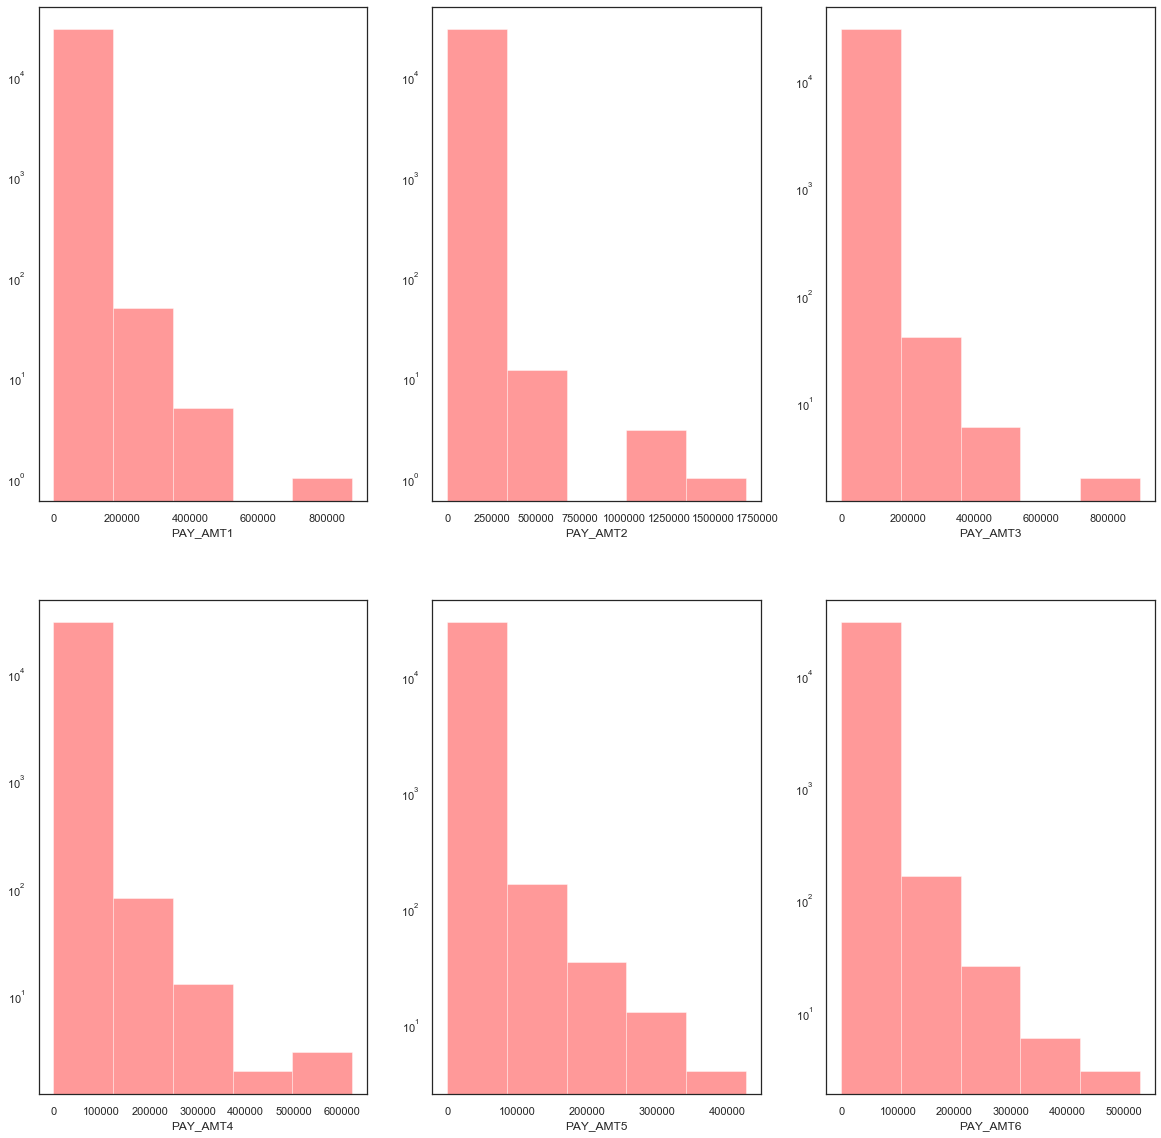

In [32]:
fig,ax = plt.subplots (2,3,figsize=(20,20)) 

sns.distplot(data['PAY_AMT1'],bins=5, kde=False, rug=False,color='red', ax=ax[0,0],hist_kws={'log':True})
sns.distplot(data['PAY_AMT2'],bins=5, kde=False, rug=False,color='red', ax=ax[0,1],hist_kws={'log':True})
sns.distplot(data['PAY_AMT3'],bins=5, kde=False, rug=False,color='red', ax=ax[0,2],hist_kws={'log':True})
sns.distplot(data['PAY_AMT4'],bins=5, kde=False, rug=False,color='red', ax=ax[1,0],hist_kws={'log':True})
sns.distplot(data['PAY_AMT5'],bins=5, kde=False, rug=False,color='red', ax=ax[1,1],hist_kws={'log':True})
sns.distplot(data['PAY_AMT6'],bins=5, kde=False, rug=False,color='red', ax=ax[1,2],hist_kws={'log':True})

### OBSERVATION: 

Most of the customers have paid less than 100k$

### <span style='background :yellow' > 12.  BIVARIATE ANALYSIS </span>

### Relationship between DEFAULT_STATUS and all the variables

1. GENDER vs DEFAULT_STATUS
2. MARRIAGE vs DEFAULT_STATUS
3. EDUCATION vs DEFAULT_STATUS
4. AGE vs  DEFAULT_STATUS
5. LIMIT_BAL vs DEFAULT_STATUS
6. PAY_1 to PAY_6 vs vs DEFAULT_STATUS
7. BILL_AMT1 to BILL_AMT6 vs DEFAULT_STATUS
8. PAY_AMT1 to PAY_AMT6 vs DEFAULT_STATUS

###  GENDER vs DEFAULT_STATUS

Text(0.5, 1.0, 'Number of default customers by gender')

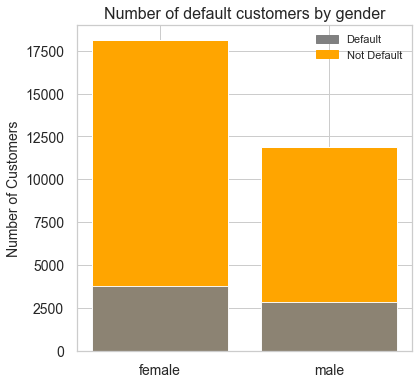

In [33]:
## Plot distribution of gender data with default, not default count

plt.figure(figsize=(6,6))
sns.set(style="whitegrid")

# Plot the chart
d  =data['GENDER'].value_counts()
x = data['GENDER'][(data['DEFAULT_STATUS']=='default')].value_counts()
plt.bar(d.index, d, align='center', color='orange')
plt.bar(x.index, x, align='center', color='gray', alpha=0.9)

# Set X and y axis labels
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1)


# Set the title
plt.title ("Number of default customers by gender", fontsize=16)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 <a list of 9 Text yticklabel objects>)

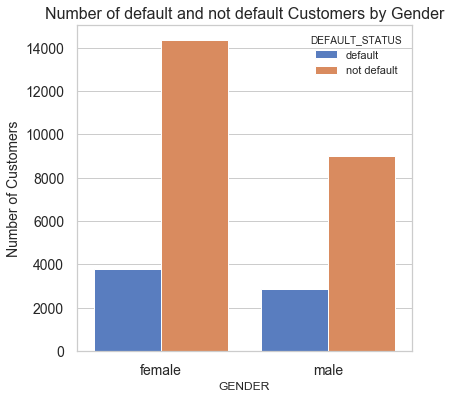

In [34]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
sns.countplot(x='GENDER',data=data,hue='DEFAULT_STATUS',palette='muted')

plt.title("Number of default and not default Customers by Gender", fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=0)
plt.yticks(fontsize=14)


In [35]:
default_Customers = data['GENDER'][data['DEFAULT_STATUS']=='default'].value_counts()
Cust_by_gender = data['GENDER'].value_counts()
print("Percentage of female and male default customers:\n", default_Customers/Cust_by_gender*100)

Percentage of female and male default customers:
 female    20.776281
male      24.167227
Name: GENDER, dtype: float64


### OBSERVATION

        
  1.20.7% Female Customers default and 24.1% Male Customers default
        
  2.Number of female default customers are more than male default customers
      
  

### MARRIAGE vs. DEFAULT_STATUS

Text(0.5, 1.0, 'Number of default customers by Marital Status')

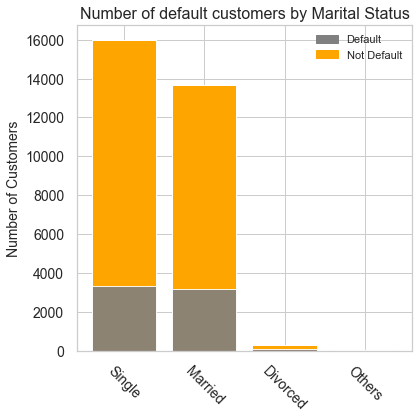

In [36]:
## Plot distribution of Marriage data with default, not default count

plt.figure(figsize=(6,6))
sns.set(style="whitegrid")

# Plot the chart
d  = marriage_data['MARRIAGE'].value_counts()
x = marriage_data['MARRIAGE'][(data['DEFAULT_STATUS']=='default')].value_counts()
plt.bar(d.index, d, align='center', color='orange')
plt.bar(x.index, x, align='center', color='gray', alpha=0.9)

# Set X and y axis labels
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=-45)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1)


# Set the title
plt.title ("Number of default customers by Marital Status", fontsize=16)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text yticklabel objects>)

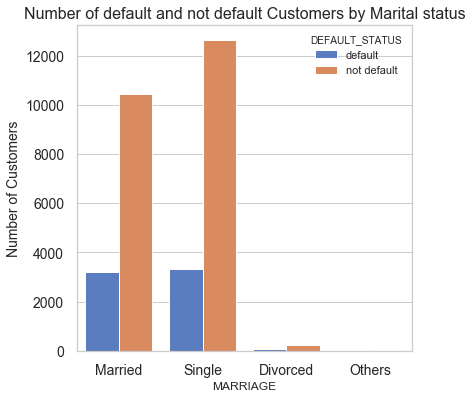

In [37]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
sns.countplot(x='MARRIAGE',data=marriage_data,hue='DEFAULT_STATUS',palette='muted')

plt.title("Number of default and not default Customers by Marital status", fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=0)
plt.yticks(fontsize=14)


In [38]:
default_Cust = marriage_data['MARRIAGE'][data['DEFAULT_STATUS']=='default'].value_counts()
Cust_by_Maritalstatus = marriage_data['MARRIAGE'].value_counts()
print("Percentage of Single and married default customers:\n", default_Cust/Cust_by_Maritalstatus*100)

Percentage of Single and married default customers:
 Single      20.928339
Married     23.471704
Divorced    26.006192
Others       9.259259
Name: MARRIAGE, dtype: float64


### OBSERVATION:  
1. 26% of divorced Customers, 23.4% of married Customers and 20.9% of Single Customers default
2. Number of default Single customers are more

###  EDUCATION vs. DEFAULT_STATUS

Text(0.5, 1.0, 'Number of default customers by Education')

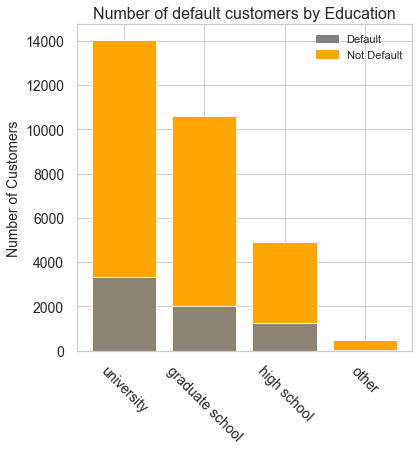

In [39]:
## Plot distribution of Education data with default, not default count

plt.figure(figsize=(6,6))
sns.set(style="whitegrid")

# Plot the graph
d  = data['EDUCATION'].value_counts()
x = data['EDUCATION'][(data['DEFAULT_STATUS']=='default')].value_counts()
plt.bar(d.index, d, align='center', color='orange')
plt.bar(x.index, x, align='center', color='gray', alpha=0.9)

# Set X and Y axis labels
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=-45)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1)

# Set the title
plt.title ("Number of default customers by Education", fontsize=16)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text yticklabel objects>)

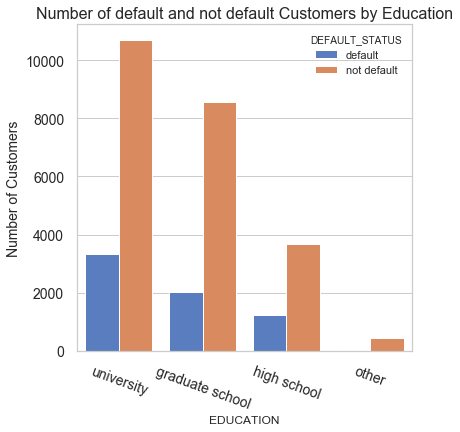

In [40]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
sns.countplot(x='EDUCATION',data=data,hue='DEFAULT_STATUS',palette='muted')

plt.title("Number of default and not default Customers by Education", fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=-20)
plt.yticks(fontsize=14)


In [41]:
default_edu_cust = data['EDUCATION'][data['DEFAULT_STATUS']=='default'].value_counts()
Cust_by_Education = data['EDUCATION'].value_counts()
print("Percentage of University and graduate default customers:\n", default_edu_cust/Cust_by_Education*100)

Percentage of University and graduate default customers:
 university         23.734854
graduate school    19.234766
high school        25.157616
other               7.051282
Name: EDUCATION, dtype: float64


### OBSERVATION: 
1. 25% of high school graduates, 23% of University graduates, 19.2% graduate school customers default

2. There are more number of University graduated default customers


### AGE vs DEFAULT_STATUS

Text(0.5, 1.0, 'Number of default Customers by Age')

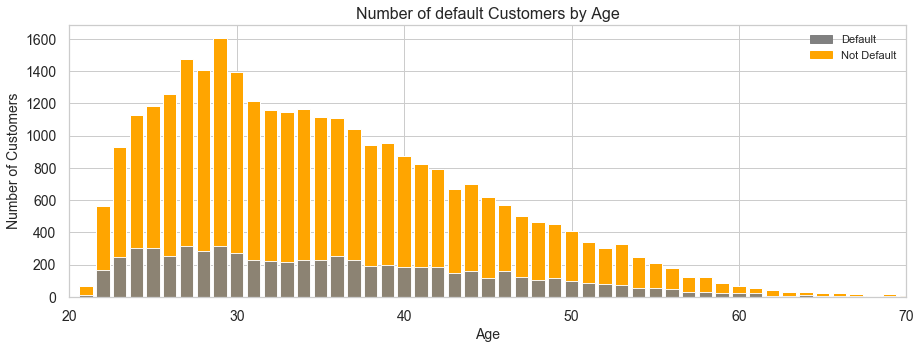

In [42]:

## Plot distribution of Age data with default, not default count
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))

# Plot the graph
d  = data['AGE'].value_counts()
x = data['AGE'][(data['DEFAULT_STATUS']=='default')].value_counts()
plt.bar(d.index, d, align='center', color='orange')
plt.bar(x.index, x, align='center', color='gray', alpha=0.9)

# Set X and y axis labels
plt.xlabel("Age", fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xlim([20,70])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1)

# Set the title
plt.title ("Number of default Customers by Age", fontsize=16)

In [43]:
Age_data= data.copy()
Age_data['Age_group'] = pd.cut(x = Age_data['AGE'], bins = [20,30,40,50,60,70,80],
                                       labels = ['20-30', '31-40','41-50','51-60','61-70','71-80'])
Cust_Agegroup  = Age_data['Age_group'].value_counts()
default_CustAge = Age_data['Age_group'][(Age_data['DEFAULT_STATUS']=='default')].value_counts()
print("Percentage of default customers in different Age group:\n", default_CustAge/Cust_Agegroup*100)

Percentage of default customers in different Age group:
 20-30    22.437120
31-40    20.433119
41-50    23.297252
51-60    25.237857
61-70    26.459144
71-80    33.333333
Name: Age_group, dtype: float64


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 <a list of 10 Text yticklabel objects>)

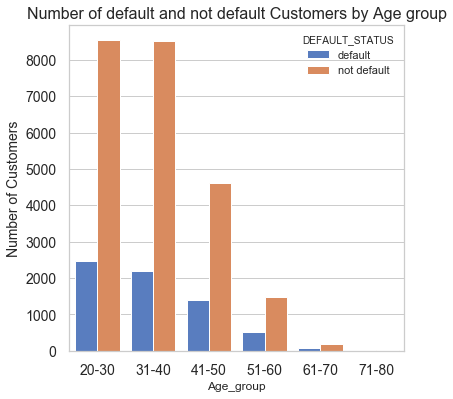

In [44]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
sns.countplot(x='Age_group',data=Age_data,hue='DEFAULT_STATUS',palette='muted')

plt.title("Number of default and not default Customers by Age group", fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=0)
plt.yticks(fontsize=14)


### OBSERVATION:
 1. 33.33% of Customers between 71-80 default followed by 61-70, 51-60 etc.
    
 2. 20-30 age group has the most number of default customers
 
 3. 22.4% of 20-30 age group customers default and 20.43% of 31-40 age group customers default

### LIMIT_BAL vs DEFAULT_STATUS

Text(0.5, 1.0, 'Credit limit by default status')

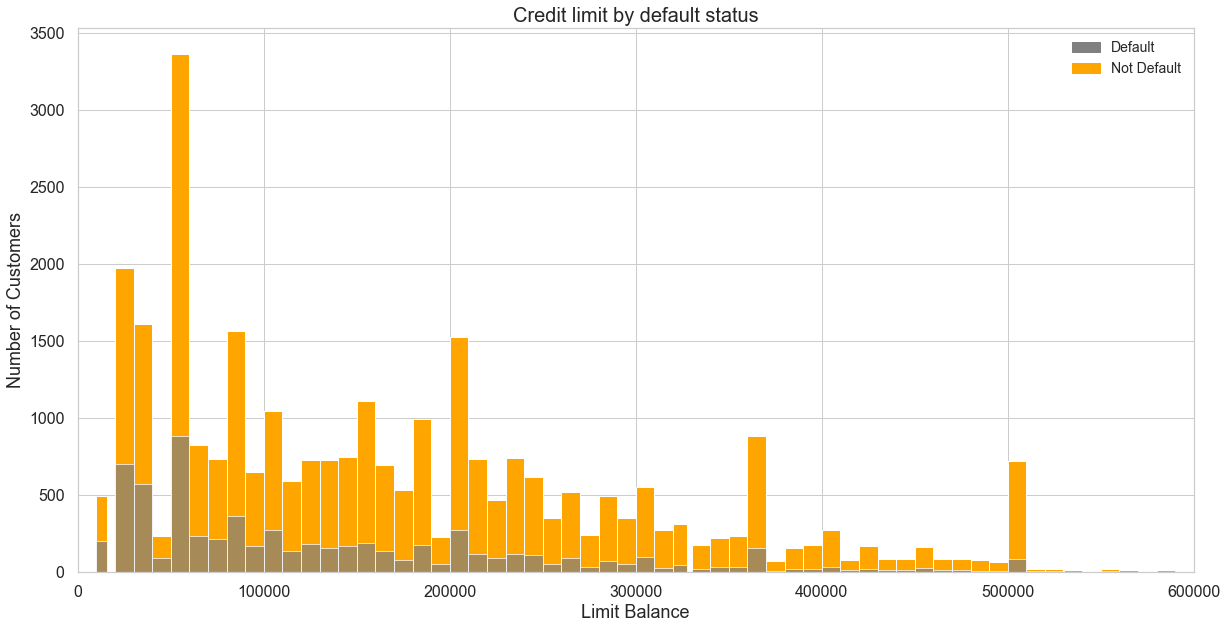

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

# Plot the graph
plt.hist(data['LIMIT_BAL'], sorted(data['LIMIT_BAL'].unique()), color ='orange')
plt.hist(data['LIMIT_BAL'][(data['DEFAULT_STATUS']=='default')], sorted(data['LIMIT_BAL'].unique()),color='grey',alpha = 0.7)

# Set X and Y axis labels
plt.xlabel('Limit Balance',fontsize=18)
plt.ylabel('Number of Customers', fontsize=18)
plt.xlim([0,600000])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],loc=1,fontsize=14)
#plt.legend(['Not Default', 'Default'], title = 'Default Status', loc='upper right', facecolor='white',fontsize=20)

# Set the title
plt.title ("Credit limit by default status", fontsize=20)

In [46]:
limit_data= data.copy()
limit_data['limit_bucket'] = pd.cut(x = limit_data['LIMIT_BAL'], bins = [0,50000,100000,150000,200000,300000,400000,500000,1000000],
                                       labels = ['0-50k','51k-100k','101k-150k','151-200k','200k-300k','300-400k','400-500k','500k-1000k'])
limit_bucket  = limit_data['limit_bucket'].value_counts()
default_limitbucket = limit_data['limit_bucket'][(limit_data['DEFAULT_STATUS']=='default')].value_counts()
print("Percentage of default customers in different Age group:\n", default_limitbucket/limit_bucket*100)

Percentage of default customers in different Age group:
 0-50k         31.787389
51k-100k      25.798424
101k-150k     21.143004
151-200k      17.848165
200k-300k     16.050603
300-400k      14.063066
400-500k      12.140175
500k-1000k    11.165049
Name: limit_bucket, dtype: float64


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

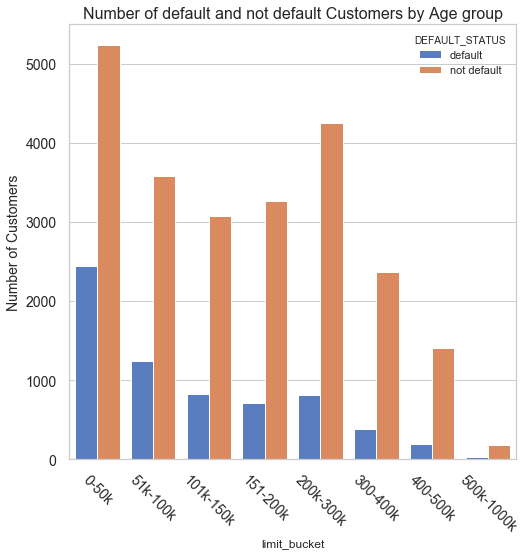

In [47]:
plt.figure(figsize=(8,8))
sns.set(style="whitegrid")
sns.countplot(x='limit_bucket',data=limit_data,hue='DEFAULT_STATUS',palette='muted')

plt.title("Number of default and not default Customers by Age group", fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=-45)
plt.yticks(fontsize=14)

###  OBSERVATION:

 1. 31.7% of Customers with Credit limit less than 50k default and 25.7% of customers with credit limit 51-100k default.
 2. There are more number of default customers with credit limit less than 50k
    

### PAY_1 to PAY_6 (Payment Status) vs DEFAULT_STATUS

 Use 6 subplots to plot the number of default and non default customers for each value of Payment status

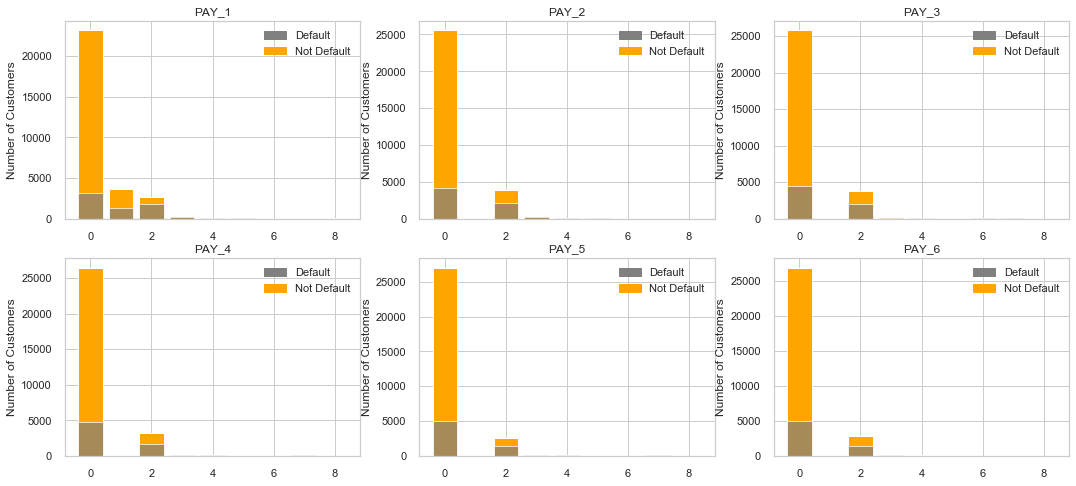

In [48]:
# List of all 6 columns
pay_status_columns =['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Set up subplots
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = data[pay_status_columns[i]].value_counts()
    x = data[pay_status_columns[i]][(data['DEFAULT_STATUS']=='default')].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='orange')
    ax[row,col].bar(x.index, x, align='center', color='gray', alpha=0.7)
    
    ax[row,col].set_ylabel("Number of Customers")
    ax[row,col].set_title(pay_status_columns[i])
    
    # Set the legend
    gray_patch = mpatches.Patch(color='gray', label='Default')
    orange_patch=mpatches.Patch(color='orange', label='Not Default')
    ax[row,col].legend(handles=[gray_patch,orange_patch],loc=1)
    

In [49]:
# Calculate percentage of not default for each value of latest payment status

def_pay1= data['PAY_1'][(data['DEFAULT_STATUS']=='not default')].value_counts()
total_pay1 = data['PAY_1'].value_counts()
Percentage= def_pay1/total_pay1*100
Percentage


0    86.165991
1    66.052061
2    30.858643
3    24.223602
4    31.578947
5    50.000000
8    42.105263
6    45.454545
7    22.222222
Name: PAY_1, dtype: float64

### 6 subplots to plot the PERCENTAGE of default and non default customers for each value of PAYMENT STATUS

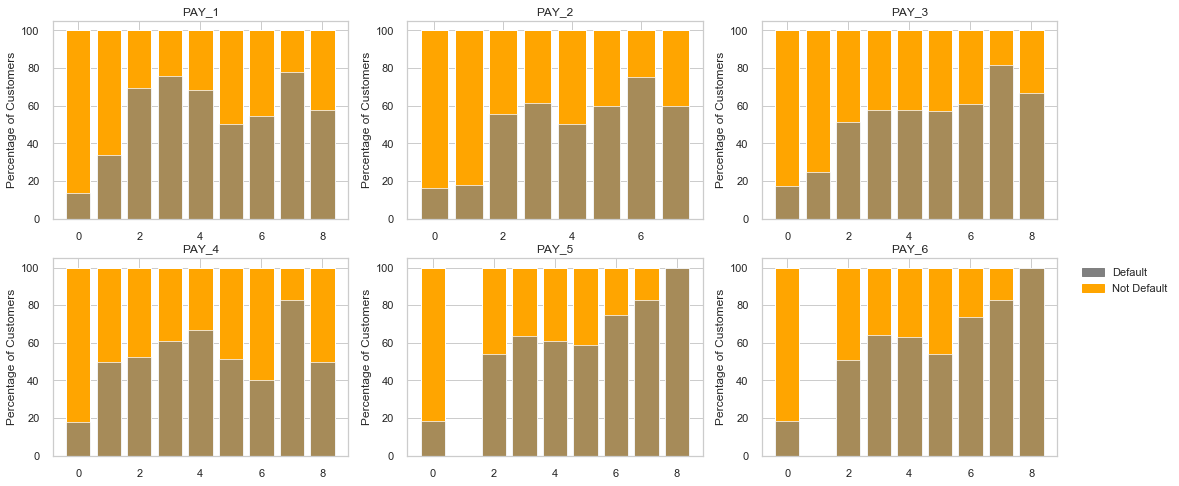

In [50]:
# List of all 6 columns
pay_status_columns =['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Set up subplots
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3


    filter = data[pay_status_columns[i]][(data['DEFAULT_STATUS']=='default')].unique()
    x= data[pay_status_columns[i]][(data['DEFAULT_STATUS']=='default')].value_counts()
    d  = data[pay_status_columns[i]][data[pay_status_columns[i]].isin (filter)].value_counts()
    percent=x/d*100
   
    ax[row,col].bar(d.index, 100, align='center', color='orange')
    ax[row,col].bar(percent.index, percent, align='center', color='gray',alpha=0.7)
    
    # Set X and Y axis labels, title
    ax[row,col].set_ylabel("Percentage of Customers")
    ax[row,col].set_title(pay_status_columns[i])
    
    # Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
orange_patch=mpatches.Patch(color='orange', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],bbox_to_anchor=(1.05, 1))

    

###  OBSERVATION:

 1.  If latest payment status (PAY_1) value=0, they are more likely to be non default

 2.  If payment status is >2, they are mostly default (more than 50% of customers)
    
 3. 87% of the Customers who have latest payment_status(PAY_1) as 0 are not default

###  PAY_AMT1 to PAY_AMT6 (Payment Amount) vs DEFAULT_STATUS

Use 6 subplots to plot the number of default and non default customers for each payment_amount

Setting y axis to log scale as we have wide range of values for payment amount

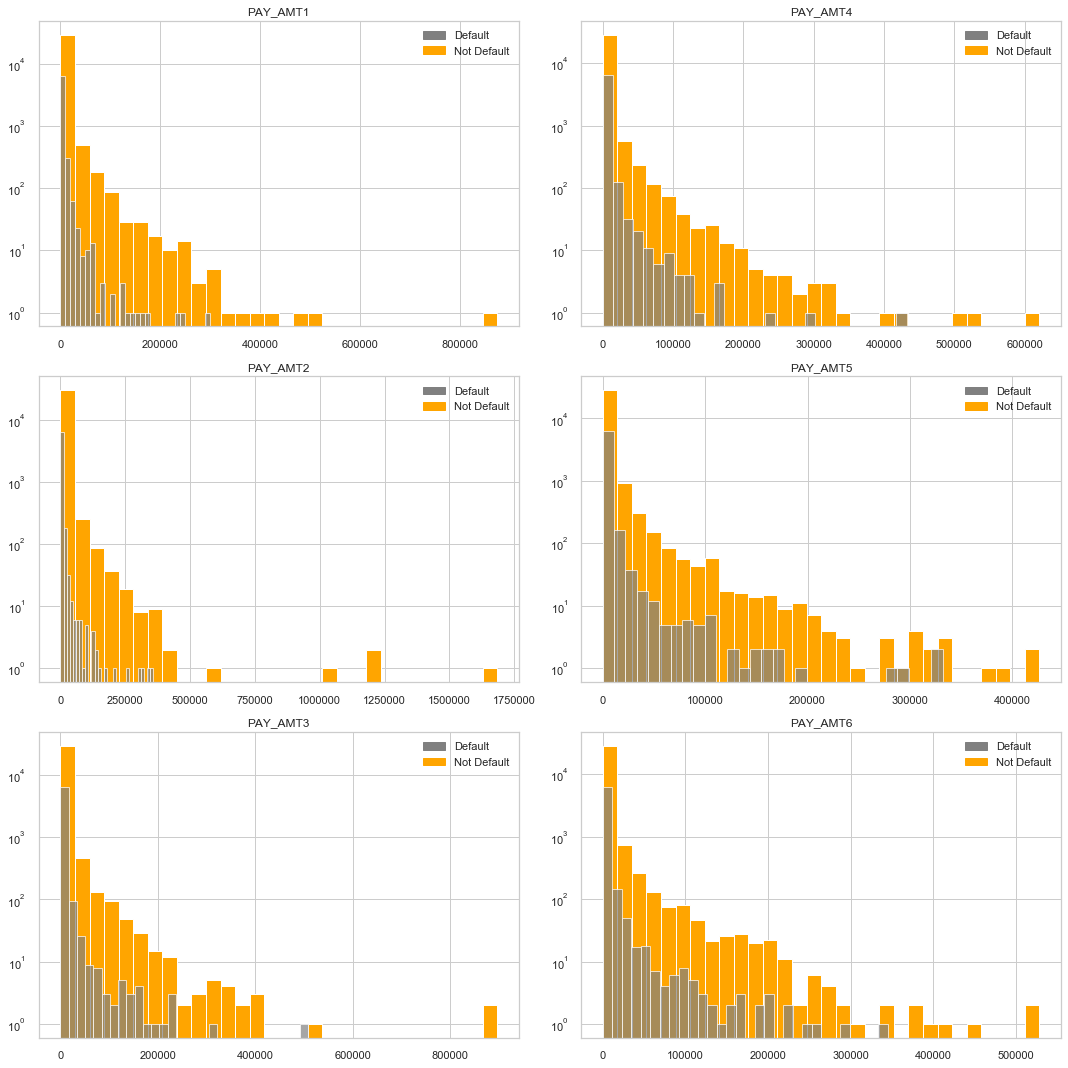

In [51]:
# List of all 6 columns
pay_amt_columns =['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

figure, ax = plt.subplots(3,2)
figure.set_size_inches(15,15)


for i in range(len(pay_amt_columns)):
    row,col =i%3, int(i/3)
   
    ax[row,col].hist(data[pay_amt_columns[i]], bins=30, color ='orange')
    ax[row,col].hist(data[pay_amt_columns[i]][(data['DEFAULT_STATUS']=='default')],bins=30,color='gray',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
    
   # Set the legend
    gray_patch = mpatches.Patch(color='gray', label='Default')
    orange_patch=mpatches.Patch(color='orange', label='Not Default')
    ax[row,col].legend(handles=[gray_patch,orange_patch],loc=1)
plt.tight_layout()
plt.show()

### BILL_AMT1 to BILL_AMT6 (Bill amount) vs DEFAULT_STATUS

Use 6 subplots to plot the number of default and non default customers for each value of Bill amount

Setting y axis to log scale as we have wide range of values for bill amount

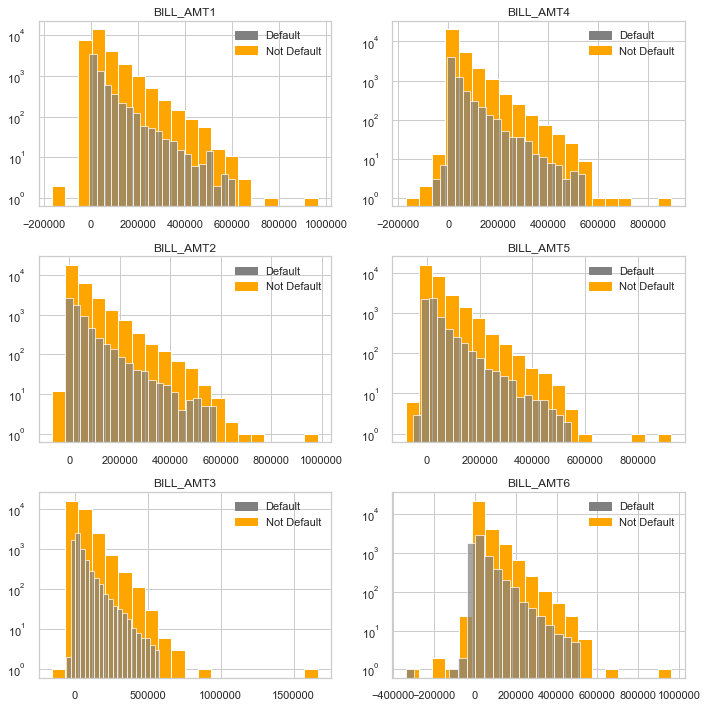

In [52]:
# List of all 6 columns
bill_amt_columns =['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

# Set up subplots
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)

for i in range(len(bill_amt_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(data[bill_amt_columns[i]], bins=20, color ='orange')
    ax[row,col].hist(data[bill_amt_columns[i]][(data['DEFAULT_STATUS']=='default')],bins=20,color='gray',alpha = 0.7)
    ax[row,col].set_title(bill_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
    
    # Set the legend
    gray_patch = mpatches.Patch(color='gray', label='Default')
    orange_patch=mpatches.Patch(color='orange', label='Not Default')
    ax[row,col].legend(handles=[gray_patch,orange_patch],loc=1)
    
plt.tight_layout()

### <span style='background :yellow' >BIVARIATE AND MULTIVARIATE ANALYSIS OF TARGET VARIABLE LIMIT_BAL </span>

### Relationship between LIMIT_BAL with other variables

1. LIMIT_BAL vs DEFAULT STATUS
2. LIMIT_BAL vs GENDER and DEFAULT STATUS
3. LIMIT_BAL vs MARRIAGE and DEFAULT STATUS
4. LIMIT_BAL vs EDUCATION and DEFAULT STATUS
5. LIMIT_BAL vs AGE and DEFAULT STATUS
6. LIMIT_BAL vs PAY_1 and DEFAULT STATUS


In [53]:
# We are going to use the below dataframe with LIMIT_BUCKET column (binned LIMIT_BAL) to plot bivariate analysis of LIMIT_BAL

limit_data= data.copy()
limit_data['limit_bucket'] = pd.cut(x = limit_data['LIMIT_BAL'], bins = [0,50000,100000,150000,200000,300000,400000,500000,1000000],
                                       labels = ['0-50k','51k-100k','101k-150k','151-200k','200k-300k','300-400k','400-500k','500k-1000k'])
limit_data['Age_group'] = pd.cut(x = limit_data['AGE'], bins = [20,30,40,50,60,70,80],
                                       labels = ['20-30', '31-40','41-50','51-60','61-70','71-80'])

### LIMIT_BAL vs DEFAULT_STATUS

Text(0.5, 1.0, 'CREDIT LIMIT VS DEFAULT')

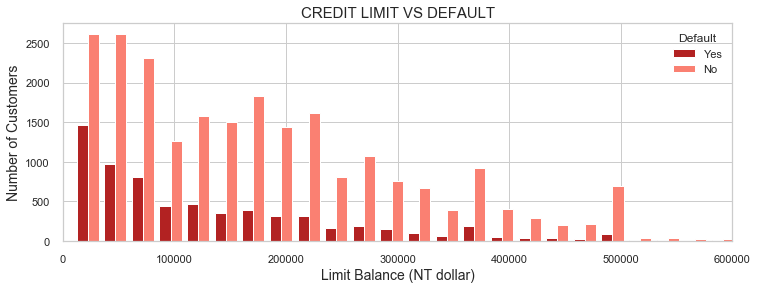

In [54]:
x1 = list(data[data['DEFAULT_STATUS'] == 'default']['LIMIT_BAL'])
x2 = list(data[data['DEFAULT_STATUS'] == 'not default']['LIMIT_BAL'])

fig2, ax_lim_bal = plt.subplots(figsize=(12,4))
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['firebrick', 'salmon'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.title('CREDIT LIMIT VS DEFAULT', SIZE=15)


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

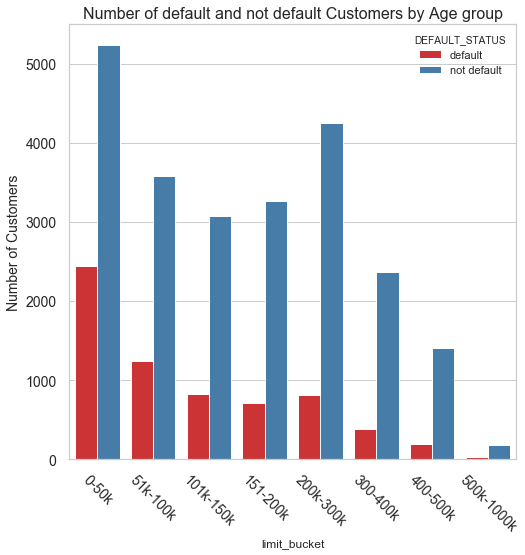

In [55]:
plt.figure(figsize=(8,8))
sns.set(style="whitegrid")
sns.countplot(x='limit_bucket',data=limit_data,hue='DEFAULT_STATUS',palette='Set1')

plt.title("Number of default and not default Customers by Age group", fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=14,rotation=-45)
plt.yticks(fontsize=14)

### OBSERVATION:

1. Maximum number of customers are under the credit limit of 50K, followed by 200-300k and 51k-100k
2. Maximum number of customers default under the credit limit of 50k
3. Number of default customers decreases as credit limit increases.

In [56]:
default = limit_data['limit_bucket'][limit_data['DEFAULT_STATUS']=='default'].value_counts()
Total = limit_data['limit_bucket'].value_counts()
percent= default/Total
percent

0-50k         0.317874
51k-100k      0.257984
101k-150k     0.211430
151-200k      0.178482
200k-300k     0.160506
300-400k      0.140631
400-500k      0.121402
500k-1000k    0.111650
Name: limit_bucket, dtype: float64

### OBSERVATION: 
    
   31.7% of Customers with credit limit less than 50k default whereas 25.7% of customers with credit limit from 51k-100k default
    
   Percentage of default customers decreases as the credit limit increases. Customers default more at lower credit limit.

### LIMIT_BAL vs GENDER

Text(0.5, 1, 'Number of male and female customers in each credit range')

<Figure size 720x720 with 0 Axes>

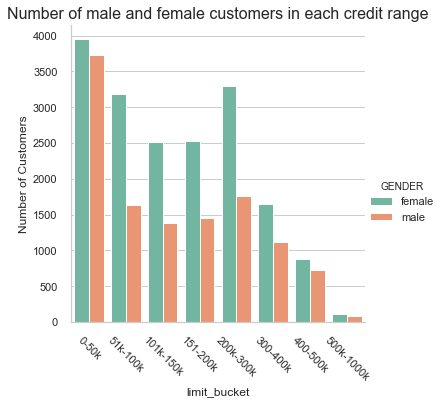

In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

ax=sns.catplot(x='limit_bucket', data=limit_data,kind='count',hue='GENDER', palette="Set2")
ax.set_xticklabels(rotation=-45)
plt.ylabel("Number of Customers")
plt.title ("Number of male and female customers in each credit range",fontsize=16)

Text(0.5, 1.0, 'Number of Customers in each credit range by Gender')

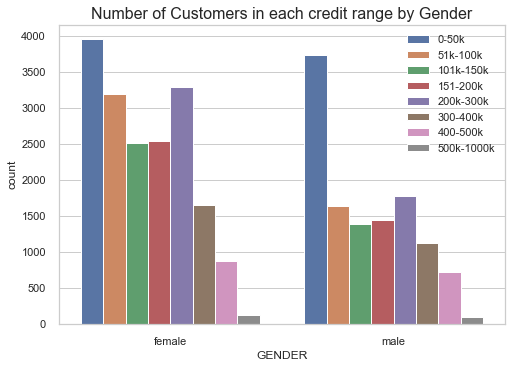

In [58]:
ax=sns.countplot(x='GENDER',hue='limit_bucket',data=limit_data)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:8], labels[:8])
plt.title ("Number of Customers in each credit range by Gender",fontsize=16)

In [59]:
gend_lim = limit_data.groupby(['GENDER','limit_bucket'])['LIMIT_BAL'].count()
gend = limit_data.groupby('GENDER')['LIMIT_BAL'].count()

gend_lim/gend*100

GENDER  limit_bucket
female  0-50k           21.814267
        51k-100k        17.612633
        101k-150k       13.874779
        151-200k        13.974161
        200k-300k       18.175795
        300-400k         9.076855
        400-500k         4.825530
        500k-1000k       0.645981
male    0-50k           31.334118
        51k-100k        13.728129
        101k-150k       11.684051
        151-200k        12.171938
        200k-300k       14.863728
        300-400k         9.379206
        400-500k         6.090175
        500k-1000k       0.748654
Name: LIMIT_BAL, dtype: float64

### OBSERVATION:

1. Number of female customers is more than male across all credit ranges. 
2. 21% of female customers and 31% of male customers have credit limit less than 50k


In [60]:
default=limit_data[limit_data['DEFAULT_STATUS']=='default'].groupby(['GENDER'])['LIMIT_BAL'].count()
print(default)
def_credit=limit_data[limit_data['DEFAULT_STATUS']=='default'].groupby(['GENDER','limit_bucket'])['LIMIT_BAL'].count()
Percent= def_credit/default


GENDER
female    3763
male      2873
Name: LIMIT_BAL, dtype: int64


### OBSERVATION: 
1. 54% of the total female default customers default at credit limit less than 100,000
2. 57% of the total male default customers default at credit limit less than 100,000

### LIMIT_BAL by GENDER and DEFAULT_STATUS

Text(0.5, 0.98, 'Number of default and non default Female and Male Customers by Credit limit')

<Figure size 720x720 with 0 Axes>

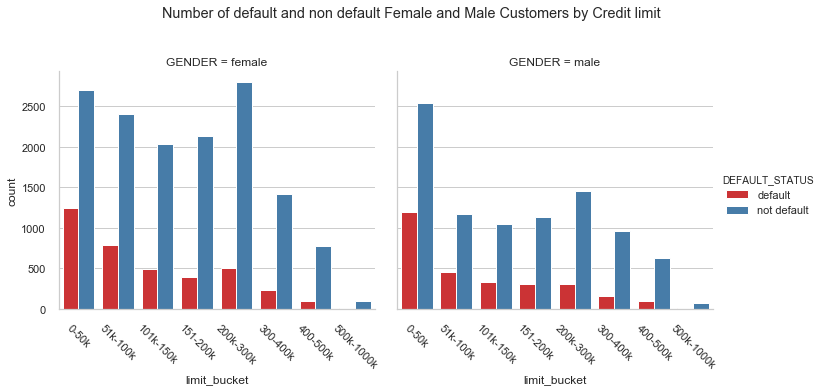

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

ax = sns.catplot(x='limit_bucket', data=limit_data,kind='count',hue='DEFAULT_STATUS', col='GENDER', palette="Set1")
ax.set_xticklabels(rotation=-45)

plt.subplots_adjust(top=0.8)
ax.fig.suptitle("Number of default and non default Female and Male Customers by Credit limit")

####  OBSERVATION:  

1. Both male and female customers default more at lower credit limits compared to higher credit limit
2. Male customers default more at Credit limit lower than 50 k(31%) compared to female (22%)

### LIMIT_BAL vs MARRIAGE

In [62]:
Total = limit_data[limit_data['MARRIAGE'].isin([1,2])].groupby(['MARRIAGE','limit_bucket'])['limit_bucket'].count()
default = limit_data[(limit_data['MARRIAGE'].isin([1,2]))&(limit_data['DEFAULT_STATUS']=='default')].groupby(['MARRIAGE','limit_bucket'])['limit_bucket'].count()
Percent = default/Total*100

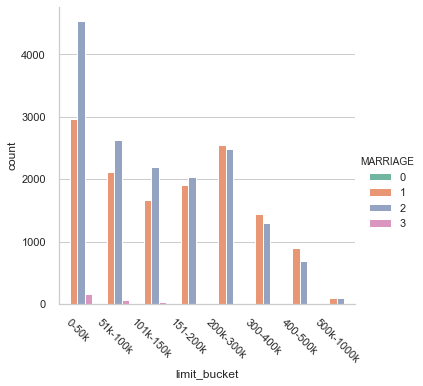

In [63]:
sns.set(style="whitegrid")
ax=sns.catplot(x='limit_bucket', data=limit_data,kind='count',hue='MARRIAGE', palette="Set2")
ax.set_xticklabels(rotation=-45)

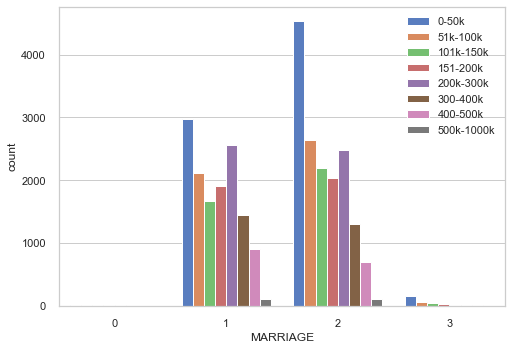

In [64]:
ax=sns.countplot(x='MARRIAGE',hue='limit_bucket',data=limit_data,palette="muted")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:8], labels[:8])

### OBSERVATION: 

1. Single customers are more under 200k credit limit
2. Married customers are more over 200k credit limit
3. Maximum number of single customers have credit limit less than 50k


### LIMIT_BAL vs MARRIAGE and DEFAULT_STATUS

Text(0.5, 0.98, 'Number of default and non default Single and Married customers by Credit limit')

<Figure size 720x720 with 0 Axes>

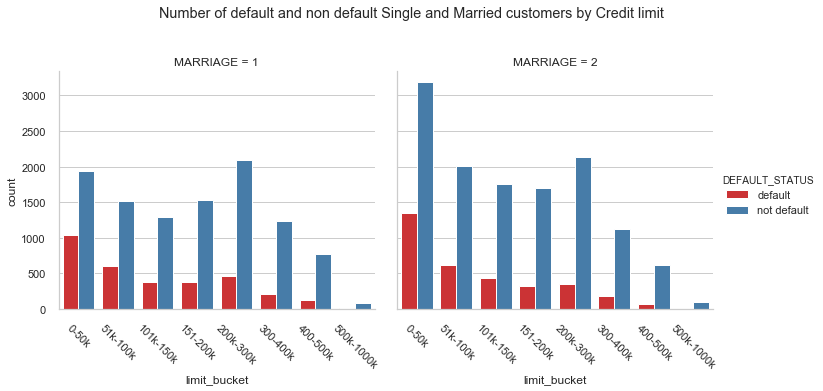

In [65]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

# Choosing only Single and married customers for plotting
ax = sns.catplot(x='limit_bucket', data=limit_data[limit_data['MARRIAGE'].isin([1,2])],kind='count',hue='DEFAULT_STATUS', col='MARRIAGE', col_wrap=2,palette="Set1")

ax.set_xticklabels(rotation=-45)
plt.subplots_adjust(top=0.8)
ax.fig.suptitle("Number of default and non default Single and Married customers by Credit limit")

### OBSERVATION:

1. As the Credit limit increases, the number and percentage of married and single customers who default decreases
2. 34.88 of married customers with credit limit less than 50k defaults.
3. 29.8 % of Single customers with credit limit less than 50k defaults.
4. Married Customers default more than single customers across all credit limit.

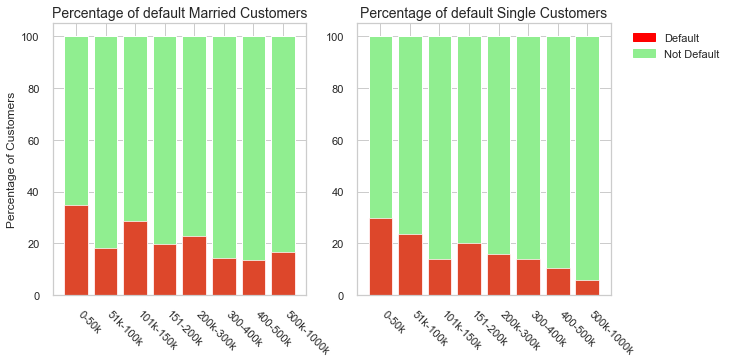

In [66]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

Married_total= limit_data['limit_bucket'][limit_data['MARRIAGE']==1].value_counts()
Married_def_total=limit_data['limit_bucket'][(limit_data['MARRIAGE']==1) & (limit_data['DEFAULT_STATUS']=='default')].value_counts()
Married_def_percent=Married_def_total/Married_total*100


Single_total= limit_data['limit_bucket'][limit_data['MARRIAGE']==2].value_counts()
Single_def_total=limit_data['limit_bucket'][(limit_data['MARRIAGE']==2) & (limit_data['DEFAULT_STATUS']=='default')].value_counts()
Single_def_percent=Single_def_total/Single_total*100
   
ax1.bar(Married_total.index, 100, align='center', color='lightgreen')
ax1.bar(Married_def_percent.index, Married_def_percent, align='center', color='red',alpha=0.7)
ax1.set_xticklabels(Married_def_percent.index, rotation=-45,ha='left')

ax2.bar(Single_total.index, 100, align='center', color='lightgreen')
ax2.bar(Single_def_percent.index, Single_def_percent, align='center', color='red',alpha=0.7)
ax2.set_xticklabels(Single_def_percent.index, rotation=-45,ha='left')

    # Set X and Y axis labels, title
ax1.set_ylabel("Percentage of Customers")
ax1.set_title('Percentage of default Married Customers',fontsize=14)
ax2.set_title('Percentage of default Single Customers',fontsize=14)


    # Set the legend
gray_patch = mpatches.Patch(color='red', label='Default')
orange_patch=mpatches.Patch(color='lightgreen', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],bbox_to_anchor=(1.05, 1))
    

### OBSERVATION: 

Married customers default more than single customers across all credit range

### Plot LIMIT_BAL  vs EDUCATION

Text(0.5, 1, ' Number of University, high school, graduates in each Credit limit range')

<Figure size 720x720 with 0 Axes>

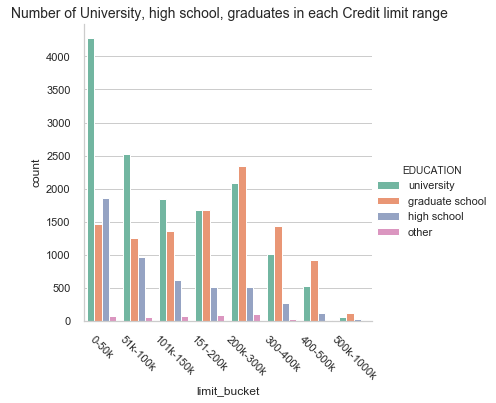

In [67]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax=sns.catplot(x='limit_bucket', data=limit_data,kind='count',hue='EDUCATION', palette="Set2")
ax.set_xticklabels(rotation=-45)
plt.title(" Number of University, high school, graduates in each Credit limit range", fontsize=14)

In [68]:
edu_total = limit_data.groupby('EDUCATION')['LIMIT_BAL'].count()
edu_cred_total = limit_data.groupby(['EDUCATION','limit_bucket'])['LIMIT_BAL'].count()
edu_cred_total/edu_total

EDUCATION        limit_bucket
graduate school  0-50k           0.138026
                 51k-100k        0.118753
                 101k-150k       0.129051
                 151-200k        0.158526
                 200k-300k       0.221634
                 300-400k        0.135475
                 400-500k        0.087482
                 500k-1000k      0.011053
high school      0-50k           0.378076
                 51k-100k        0.198292
                 101k-150k       0.125686
                 151-200k        0.105959
                 200k-300k       0.105756
                 300-400k        0.055115
                 400-500k        0.026236
                 500k-1000k      0.004881
other            0-50k           0.170940
                 51k-100k        0.130342
                 101k-150k       0.153846
                 151-200k        0.205128
                 200k-300k       0.213675
                 300-400k        0.072650
                 400-500k        0.042735
    

### OBSERVATION:
1. Maximum number of customers are University graduates and 30.4% of them have credit limit under 50K.
2. High school customers have lower credit limit and almost 37.8% have credit limit under 50k
3. Number of high school customers decrease as the credit limit increases
4. Graduates have higher credit limit and 22.1% of them have credit limit of 200-300k


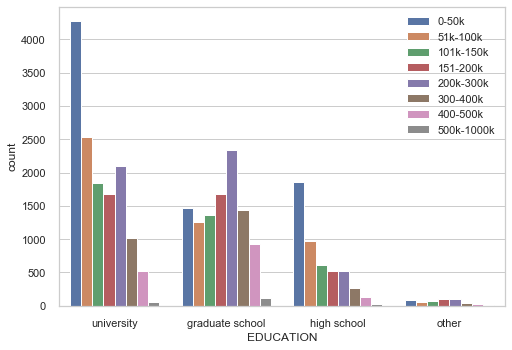

In [69]:
ax=sns.countplot(x='EDUCATION',hue='limit_bucket',data=limit_data)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:8], labels[:8])

### OBSERVATION:

1. Maximum number of customers above 200k credit limit are graduates. They are given higher credit limit
2. There are less number of high school graduates in 400-500k than others

### LIMIT_BAL vs EDUCATION and DEFAULT_STATUS

Text(0.5, 0.98, 'Number of default and non default University,graduate, highschool customers by Credit limit')

<Figure size 720x720 with 0 Axes>

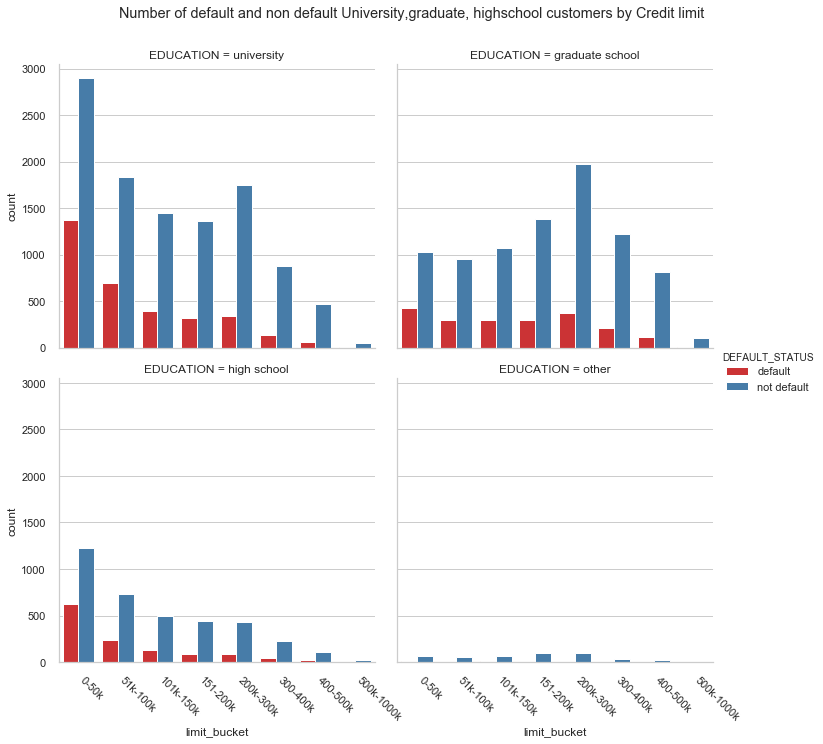

In [70]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

ax = sns.catplot(x='limit_bucket', data=limit_data,kind='count',hue='DEFAULT_STATUS', col='EDUCATION', col_wrap=2,palette="Set1")
ax.set_xticklabels(rotation=-45,ha='left')
plt.subplots_adjust(top=0.9)
ax.fig.suptitle("Number of default and non default University,graduate, highschool customers by Credit limit")

### OBSERVATION:

1. 33.7% high school, 32% University, 29.3% graduate school default under 50k credit limit
2. 27% University, 24.8% high school, 23.8% graduate default in 51k-100k range
3. Percentage of defaulters decrease as credit limit increase

Text(0.5, 1.0, 'Percentage of default customers in each category')

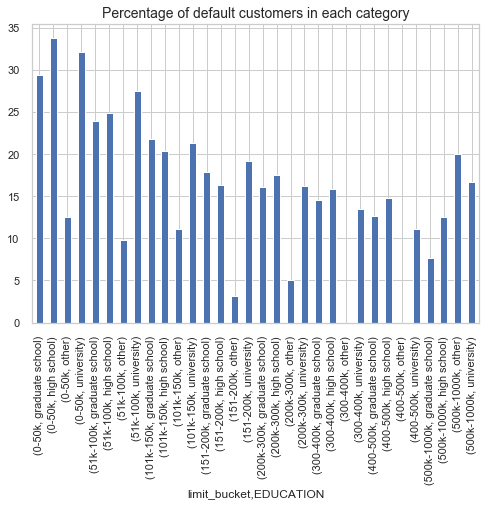

In [71]:
t=limit_data.groupby(['limit_bucket','EDUCATION'])['limit_bucket'].count()
d=limit_data[limit_data['DEFAULT_STATUS']=='default'].groupby(['limit_bucket','EDUCATION'])['limit_bucket'].count()
percent = d/t*100
percent.plot(kind='bar')
plt.title ("Percentage of default customers in each category",fontsize=14)

### Percentage of Customers defaulting in each credit range 

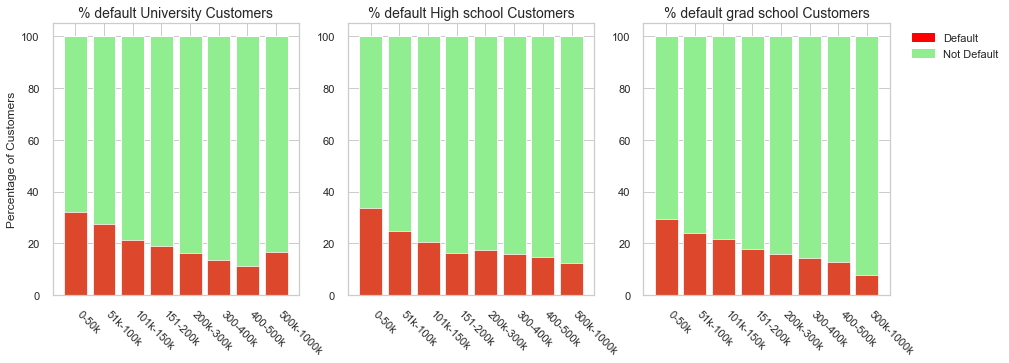

In [72]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(15, 5))

University_total= limit_data['limit_bucket'][limit_data['EDUCATION']=='university'].value_counts().sort_index()
Univ_def_total=limit_data['limit_bucket'][(limit_data['EDUCATION']=='university') & (limit_data['DEFAULT_STATUS']=='default')].value_counts().sort_index()
Univ_def_percent=Univ_def_total/University_total*100


high_total= limit_data['limit_bucket'][limit_data['EDUCATION']=='high school'].value_counts().sort_index()
high_def_total=limit_data['limit_bucket'][(limit_data['EDUCATION']=='high school') & (limit_data['DEFAULT_STATUS']=='default')].value_counts().sort_index()
high_def_percent=high_def_total/high_total*100

grad_total= limit_data['limit_bucket'][limit_data['EDUCATION']=='graduate school'].value_counts().sort_index()
grad_def_total=limit_data['limit_bucket'][(limit_data['EDUCATION']=='graduate school') & (limit_data['DEFAULT_STATUS']=='default')].value_counts().sort_index()
grad_def_percent=grad_def_total/grad_total*100
   
ax1.bar(University_total.index, 100, align='center', color='lightgreen')
ax1.bar(Univ_def_percent.index, Univ_def_percent, align='center', color='red',alpha=0.7)
ax1.set_xticklabels(Univ_def_percent.index,rotation=-45,ha='left')

ax2.bar(high_total.index, 100, align='center', color='lightgreen')
ax2.bar(high_def_percent.index, high_def_percent, align='center', color='red',alpha=0.7)
ax2.set_xticklabels(high_def_percent.index, rotation=-45,ha='left')

ax3.bar(grad_total.index, 100, align='center', color='lightgreen')
ax3.bar(grad_def_percent.index, grad_def_percent, align='center', color='red',alpha=0.7)
ax3.set_xticklabels(grad_def_percent.index, rotation=-45,ha='left')

    # Set X and Y axis labels, title
ax1.set_ylabel("Percentage of Customers")
ax1.set_title('% default University Customers',fontsize=14)
ax2.set_title('% default High school Customers',fontsize=14)
ax3.set_title('% default grad school Customers',fontsize=14)

    # Set the legend
gray_patch = mpatches.Patch(color='red', label='Default')
orange_patch=mpatches.Patch(color='lightgreen', label='Not Default')
plt.legend(handles=[gray_patch,orange_patch],bbox_to_anchor=(1.05, 1))

### OBSERVATION:

All customers default more in 0-50k credit limit



### LIMIT_BAL vs AGE

Text(0.5, 1.0, 'Number of Customers in each age group by Credit limit range')

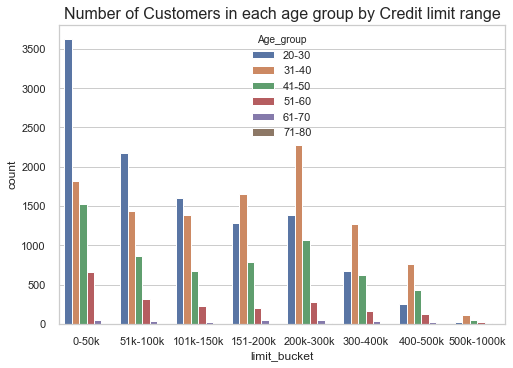

In [73]:
sns.set(style="whitegrid")
sns.countplot(x='limit_bucket',data=limit_data,hue='Age_group')
plt.title("Number of Customers in each age group by Credit limit range", fontsize=16)

### OBSERVATION:

1. Maximum number of customers under 150k credit limit are aged 20-30
2. Customers aged 30-40 have higher credit limit and they are maximum number of customers over 150k
3. Number of customers aged 20-30 decreased as the credit limit increases

Text(0.5, 1.0, 'Number of Customers in each credit limit range by Age group')

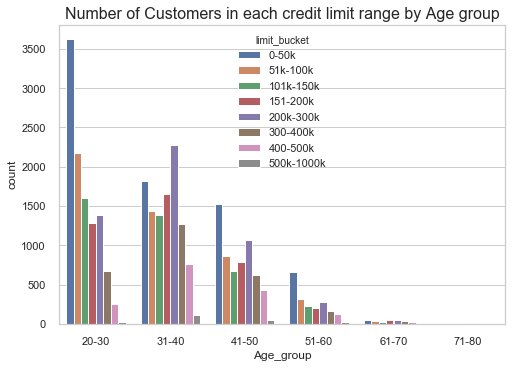

In [74]:
sns.countplot(x='Age_group',hue='limit_bucket',data=limit_data)
plt.title("Number of Customers in each credit limit range by Age group", fontsize=16)

### OBSERVATION: 




Text(0.5, 0.98, 'Number of default and non default different aged customers by Credit limit')

<Figure size 1080x720 with 0 Axes>

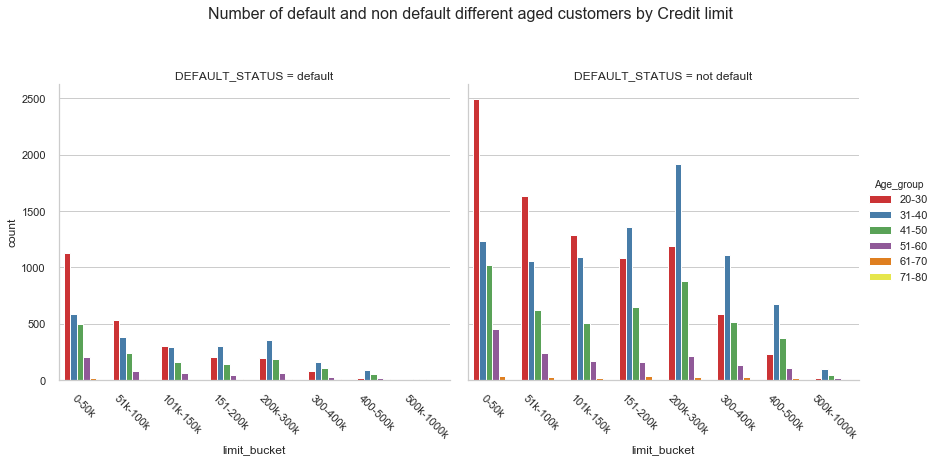

In [75]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.catplot(x='limit_bucket', data=limit_data,kind='count',hue='Age_group', col='DEFAULT_STATUS', col_wrap=2,palette="Set1",height=6)
ax.set_xticklabels(rotation=-45)
plt.subplots_adjust(top=0.8)
ax.fig.suptitle("Number of default and non default different aged customers by Credit limit",fontsize=16)

### OBSERVATION:
Number of Customers in the age group 31-40 is more followed by 20-30.

Customers aged 21-30 are more for credit limit under 150k.

Customers aged 31-40 have higher credit limits.


### LIMIT_BAL with PAY_1

### LIMIT_BAL vs PAY_1 and DEFAULT_STATUS

Text(0.5, 0.98, 'Number of default and non default by Payment status and Credit limit')

<Figure size 720x720 with 0 Axes>

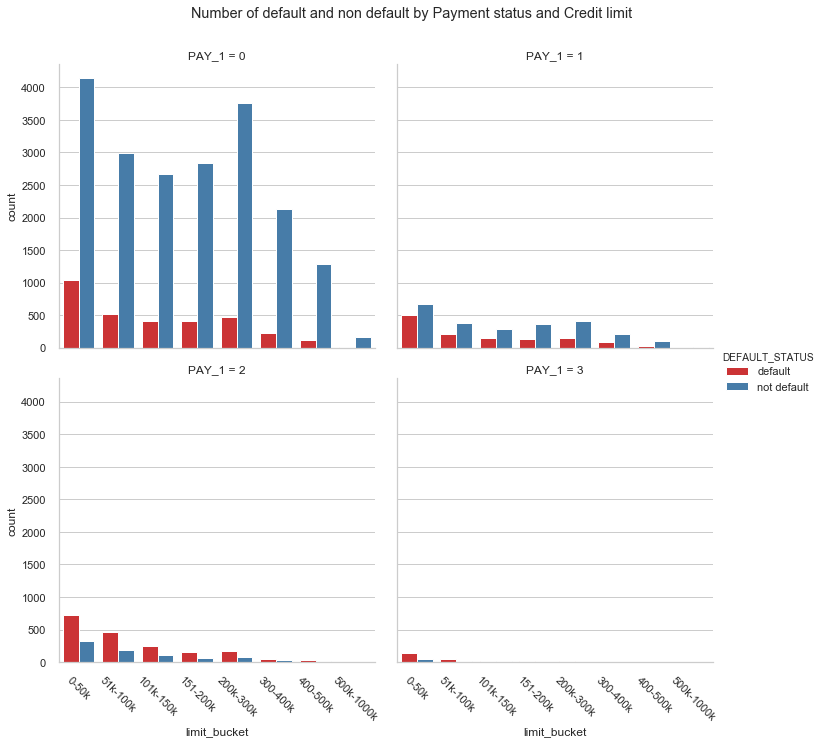

In [76]:
plt.figure(figsize=(10,10))
ax=sns.catplot(x="limit_bucket", col='PAY_1', kind='count', col_wrap=2,
                 data=limit_data[limit_data['PAY_1'].isin([0,1,2,3])], hue='DEFAULT_STATUS' ,palette="Set1")
ax.set_xticklabels(rotation=-45)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle("Number of default and non default by Payment status and Credit limit")

### OBSERVATION:
PAY_1=0 means higher chance of not default across all credit ranges. As the value increases (payment gets delayed), the number of people defaulting is more

### <span style='background :yellow' >13. MULTIVARIATE ANALYSIS OF TARGET VARIABLE</span>

### LIMIT_BAL vs AGE,EDUCATION, DEFAULT_STATUS

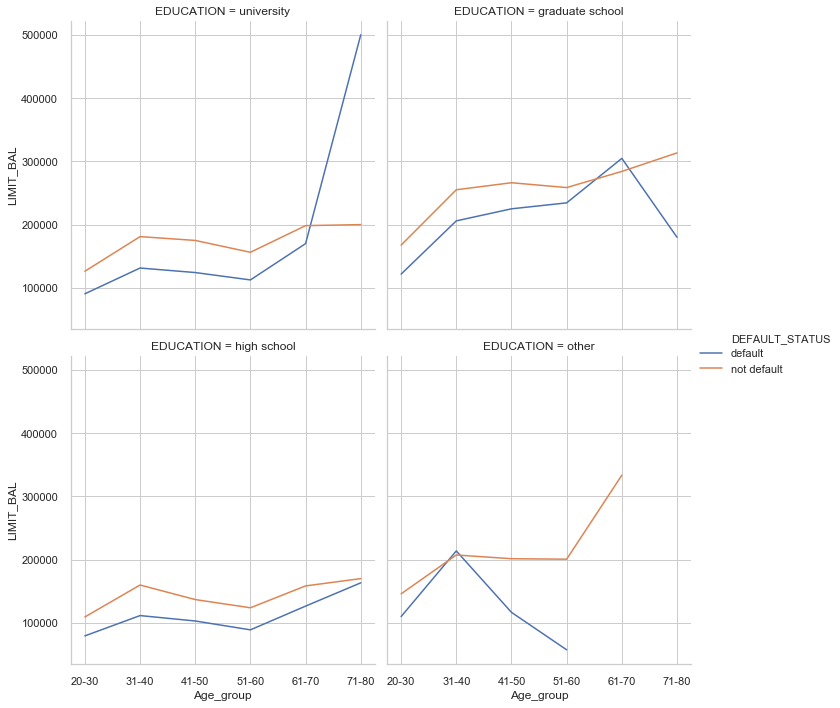

In [77]:
sns.relplot(x="Age_group", y="LIMIT_BAL", hue="DEFAULT_STATUS",
                col="EDUCATION",ci=None, col_wrap=2, data=limit_data,kind='line')

### OBSERVATION: 
High school customers default at lower credit.

Graduate customers default at higher credit limit compared to high school and university graduates.

For any category of Education, as age increases, the credit limit at which they default on an average also increases.

### LIMIT_BAL vs AGE, MARRIAGE and DEFAULT_STATUS

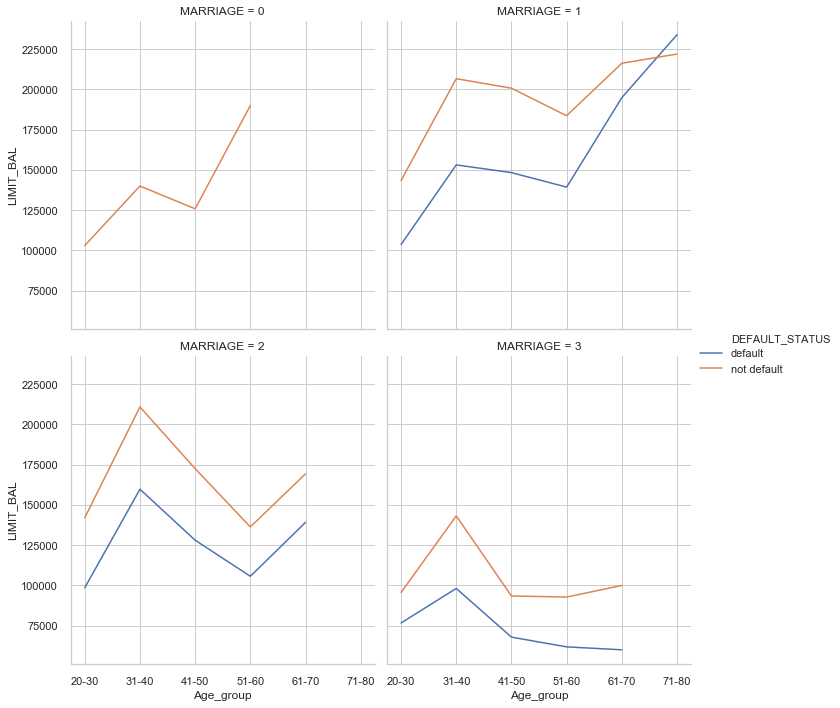

In [78]:
sns.relplot(x="Age_group", y="LIMIT_BAL", hue="DEFAULT_STATUS",
                col="MARRIAGE", ci=None,col_wrap=2, data=limit_data,kind='line')

### LIMIT_BAL vs AGE, GENDER and DEFAULT_STATUS

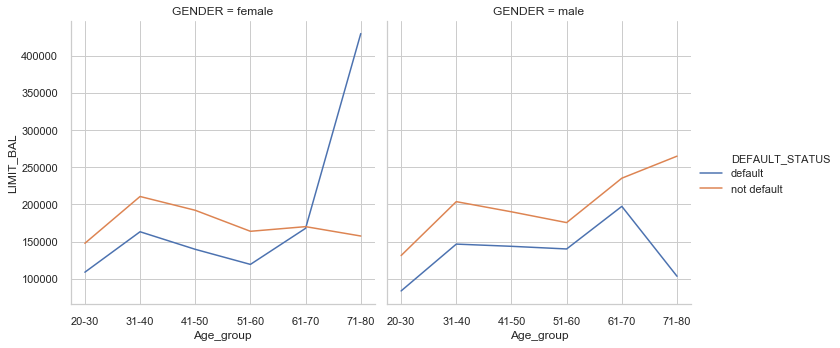

In [79]:
sns.relplot(x="Age_group", y="LIMIT_BAL", hue="DEFAULT_STATUS",
                col="GENDER",col_wrap=2,ci=None, data=limit_data,kind='line')

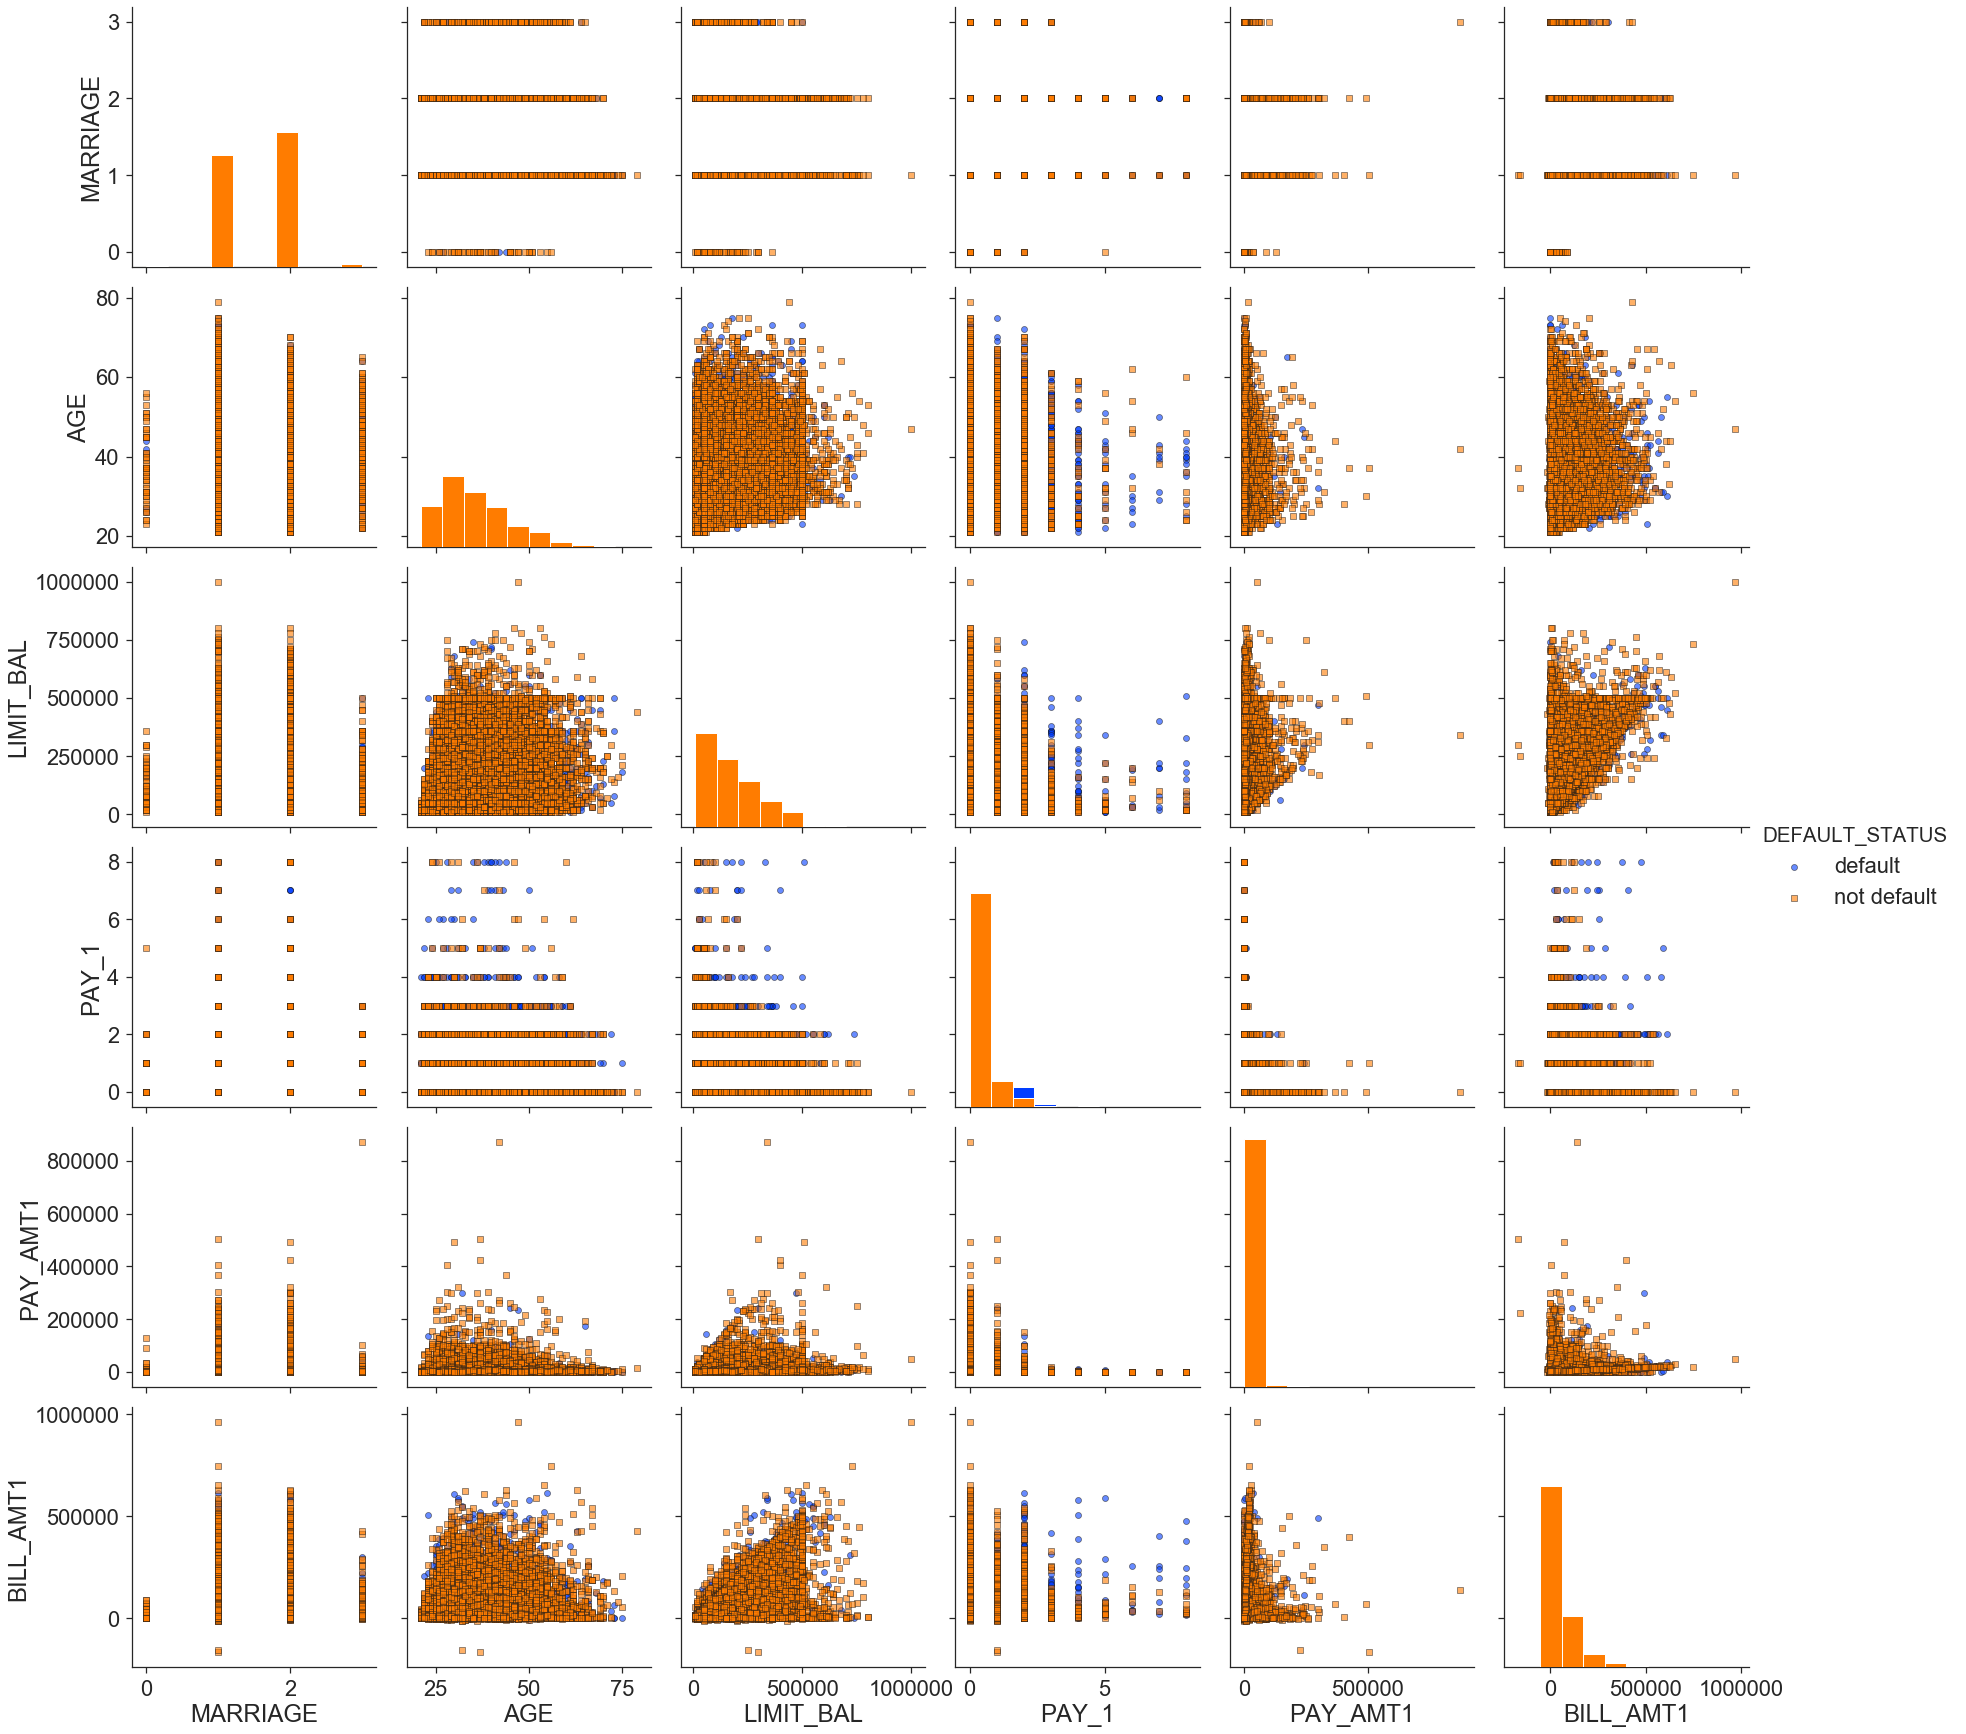

In [80]:
# Pairplot of all variables

sns.set(font_scale=2, style="ticks")
sns.pairplot(data=data[['GENDER','MARRIAGE','EDUCATION','AGE','LIMIT_BAL','DEFAULT_STATUS','PAY_1','PAY_AMT1','BILL_AMT1']], hue = 'DEFAULT_STATUS',  markers=["o", "s"], diag_kind = 'hist',
             plot_kws = {'alpha': 0.6,  'edgecolor': 'k'},
             height = 4, palette="bright")

###  <span style='background :yellow' > 14. Encode Categorical Variables </span>

#### Label encode GENDER and DEFAULT_STATUS, 2 class variables

In [81]:
## Create instance, fit to column and transform the values to labels

le= LabelEncoder()
le.fit(data['GENDER'])
data['GENDER']= le.transform(data['GENDER'])


In [82]:
## Create instance, fit to column and transform the values to labels

le= LabelEncoder()
le.fit(data['DEFAULT_STATUS'])
data['DEFAULT_STATUS']= le.transform(data['DEFAULT_STATUS'])


#### One hot encode EDUCATION column


In [83]:
## After One hot encoding, 4 new EDUCATION columns are added
data=pd.get_dummies(data, prefix=['EDUCATION'], columns=['EDUCATION'])

#### One hot encode MARRIAGE column



In [84]:
data['MARRIAGE'].replace({1: "Married",
                          2: "Single",
                          3: "Divorced",
                          0: "Others"}, inplace=True)
data=pd.get_dummies(data, prefix=['MARRIAGE'], columns=['MARRIAGE'])

#### OBSERVATION:

After one hot encoding, 

1. MARRIAGE column is split into MARRIAGE_Married, MARRIAGE_Single, MARRIAGE_Divorced, MARRIAGE_Others
2. EDUCATION column is split into EDUCATION_graduate school, EDUCATION_high school, EDUCATION_university and EDUCATION_other


In [85]:
data

LIMIT_BAL  GENDER  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0          20000       0   24      2      2      0      0      0      0   
1         120000       0   26      0      2      0      0      0      2   
2          90000       0   34      0      0      0      0      0      0   
3          50000       0   37      0      0      0      0      0      0   
4          50000       1   57      0      0      0      0      0      0   
...          ...     ...  ...    ...    ...    ...    ...    ...    ...   
29995     220000       1   39      0      0      0      0      0      0   
29996     150000       1   43      0      0      0      0      0      0   
29997      30000       1   37      4      3      2      0      0      0   
29998      80000       1   41      1      0      0      0      0      0   
29999      50000       1   46      0      0      0      0      0      0   

       BILL_AMT1  ...  PAY_AMT6  DEFAULT_STATUS  EDUCATION_graduate school  \
0           3913  ...         0               0                          0   
1           2682  ...      2000               0                          0   
2          29239  ...      5000               1                          0   
3          46990  ...      1000               1                          0   
4           8617  ...       679               1                          0   
...          ...  ...       ...             ...                        ...   
29995     188948  ...      1000               1                          0   
29996       1683  ...         0               1                          0   
29997       3565  ...      3100               0                          0   
29998      -1645  ...      1804               0                          0   
29999      47929  ...      1000               0                          0   

       EDUCATION_high school  EDUCATION_other  EDUCATION_university  \
0                          0                0                     1   
1                          0                0                     1   
2                          0                0                     1   
3                          0                0                     1   
4                          0                0                     1   
...                      ...              ...                   ...   
29995                      1                0                     0   
29996                      1                0                     0   
29997                      0                0                     1   
29998                      1                0                     0   
29999                      0                0                     1   

       MARRIAGE_Divorced  MARRIAGE_Married  MARRIAGE_Others  MARRIAGE_Single  
0                      0                 1                0                0  
1                      0                 0                0                1  
2                      0                 0                0                1  
3                      0                 1                0                0  
4                      0                 1                0                0  
...                  ...               ...              ...              ...  
29995                  0                 1                0                0  
29996                  0                 0                0                1  
29997                  0                 0                0                1  
29998                  0                 1                0                0  
29999                  0                 1                0                0  

[30000 rows x 30 columns]

### <span style='background :yellow' >15. Correlation Matrix </span>

In [86]:
# Correlation matrix is calculated only for numerical columns

corrmat=data.corr()
corrmat

LIMIT_BAL    GENDER       AGE     PAY_1     PAY_2  \
LIMIT_BAL                   1.000000 -0.024755  0.144713 -0.170745 -0.197136   
GENDER                     -0.024755  1.000000  0.090874  0.034475  0.044750   
AGE                         0.144713  0.090874  1.000000 -0.001447 -0.008774   
PAY_1                      -0.170745  0.034475 -0.001447  1.000000  0.698389   
PAY_2                      -0.197136  0.044750 -0.008774  0.698389  1.000000   
PAY_3                      -0.191323  0.041227 -0.014266  0.516970  0.663529   
PAY_4                      -0.180629  0.039737 -0.007288  0.460224  0.512773   
PAY_5                      -0.170045  0.038533 -0.013277  0.424473  0.462717   
PAY_6                      -0.167820  0.032061 -0.016948  0.373805  0.407086   
BILL_AMT1                   0.285430  0.033642  0.056239 -0.000819  0.011684   
BILL_AMT2                   0.278314  0.031183  0.054283  0.009137  0.015932   
BILL_AMT3                   0.283236  0.024563  0.053710  0.013307  0.022950   
BILL_AMT4                   0.293988  0.021880  0.051353  0.022100  0.032467   
BILL_AMT5                   0.295562  0.017005  0.049345  0.030731  0.040422   
BILL_AMT6                   0.290389  0.016733  0.047613  0.030201  0.042222   
PAY_AMT1                    0.195236  0.000242  0.026147 -0.079177 -0.097475   
PAY_AMT2                    0.178408  0.001391  0.021785 -0.057189 -0.054838   
PAY_AMT3                    0.210167  0.008597  0.029247 -0.062620 -0.059865   
PAY_AMT4                    0.203242  0.002229  0.021379 -0.061886 -0.053981   
PAY_AMT5                    0.217202  0.001667  0.022850 -0.053784 -0.048714   
PAY_AMT6                    0.219595  0.002766  0.019478 -0.048733 -0.043099   
DEFAULT_STATUS              0.153520 -0.039961 -0.013890 -0.396019 -0.327093   
EDUCATION_graduate school   0.258777  0.022750 -0.100423 -0.067995 -0.083577   
EDUCATION_high school      -0.139686  0.007650  0.231252  0.041765  0.043848   
EDUCATION_other             0.013420 -0.008498  0.008982 -0.025452 -0.038173   
EDUCATION_university       -0.147530 -0.025353 -0.077626  0.040454  0.056992   
MARRIAGE_Divorced          -0.055806  0.001985  0.082771  0.004147 -0.000149   
MARRIAGE_Married            0.103701 -0.030463  0.449425  0.013018  0.009907   
MARRIAGE_Others            -0.011299 -0.011895  0.010731  0.000760  0.002666   
MARRIAGE_Single            -0.090998  0.031004 -0.466584 -0.013915 -0.010084   

                              PAY_3     PAY_4     PAY_5     PAY_6  BILL_AMT1  \
LIMIT_BAL                 -0.191323 -0.180629 -0.170045 -0.167820   0.285430   
GENDER                     0.041227  0.039737  0.038533  0.032061   0.033642   
AGE                       -0.014266 -0.007288 -0.013277 -0.016948   0.056239   
PAY_1                      0.516970  0.460224  0.424473  0.373805  -0.000819   
PAY_2                      0.663529  0.512773  0.462717  0.407086   0.011684   
PAY_3                      1.000000  0.678931  0.551430  0.492827  -0.020586   
PAY_4                      0.678931  1.000000  0.745419  0.602875  -0.025184   
PAY_5                      0.551430  0.745419  1.000000  0.740357  -0.018581   
PAY_6                      0.492827  0.602875  0.740357  1.000000  -0.019581   
BILL_AMT1                 -0.020586 -0.025184 -0.018581 -0.019581   1.000000   
BILL_AMT2                 -0.000968 -0.012569 -0.008614 -0.009790   0.951484   
BILL_AMT3                  0.002447  0.002670  0.003377  0.001691   0.892279   
BILL_AMT4                  0.016579  0.014654  0.024139  0.020598   0.860272   
BILL_AMT5                  0.026196  0.027239  0.036216  0.041785   0.829779   
BILL_AMT6                  0.028979  0.033138  0.042616  0.046012   0.802650   
PAY_AMT1                  -0.039356 -0.054484 -0.053692 -0.047804   0.140277   
PAY_AMT2                  -0.073670 -0.036877 -0.039586 -0.039868   0.099355   
PAY_AMT3                  -0.057702 -0.074064 -0.037270 -0.040160   0.156887   
PAY_AMT4                  

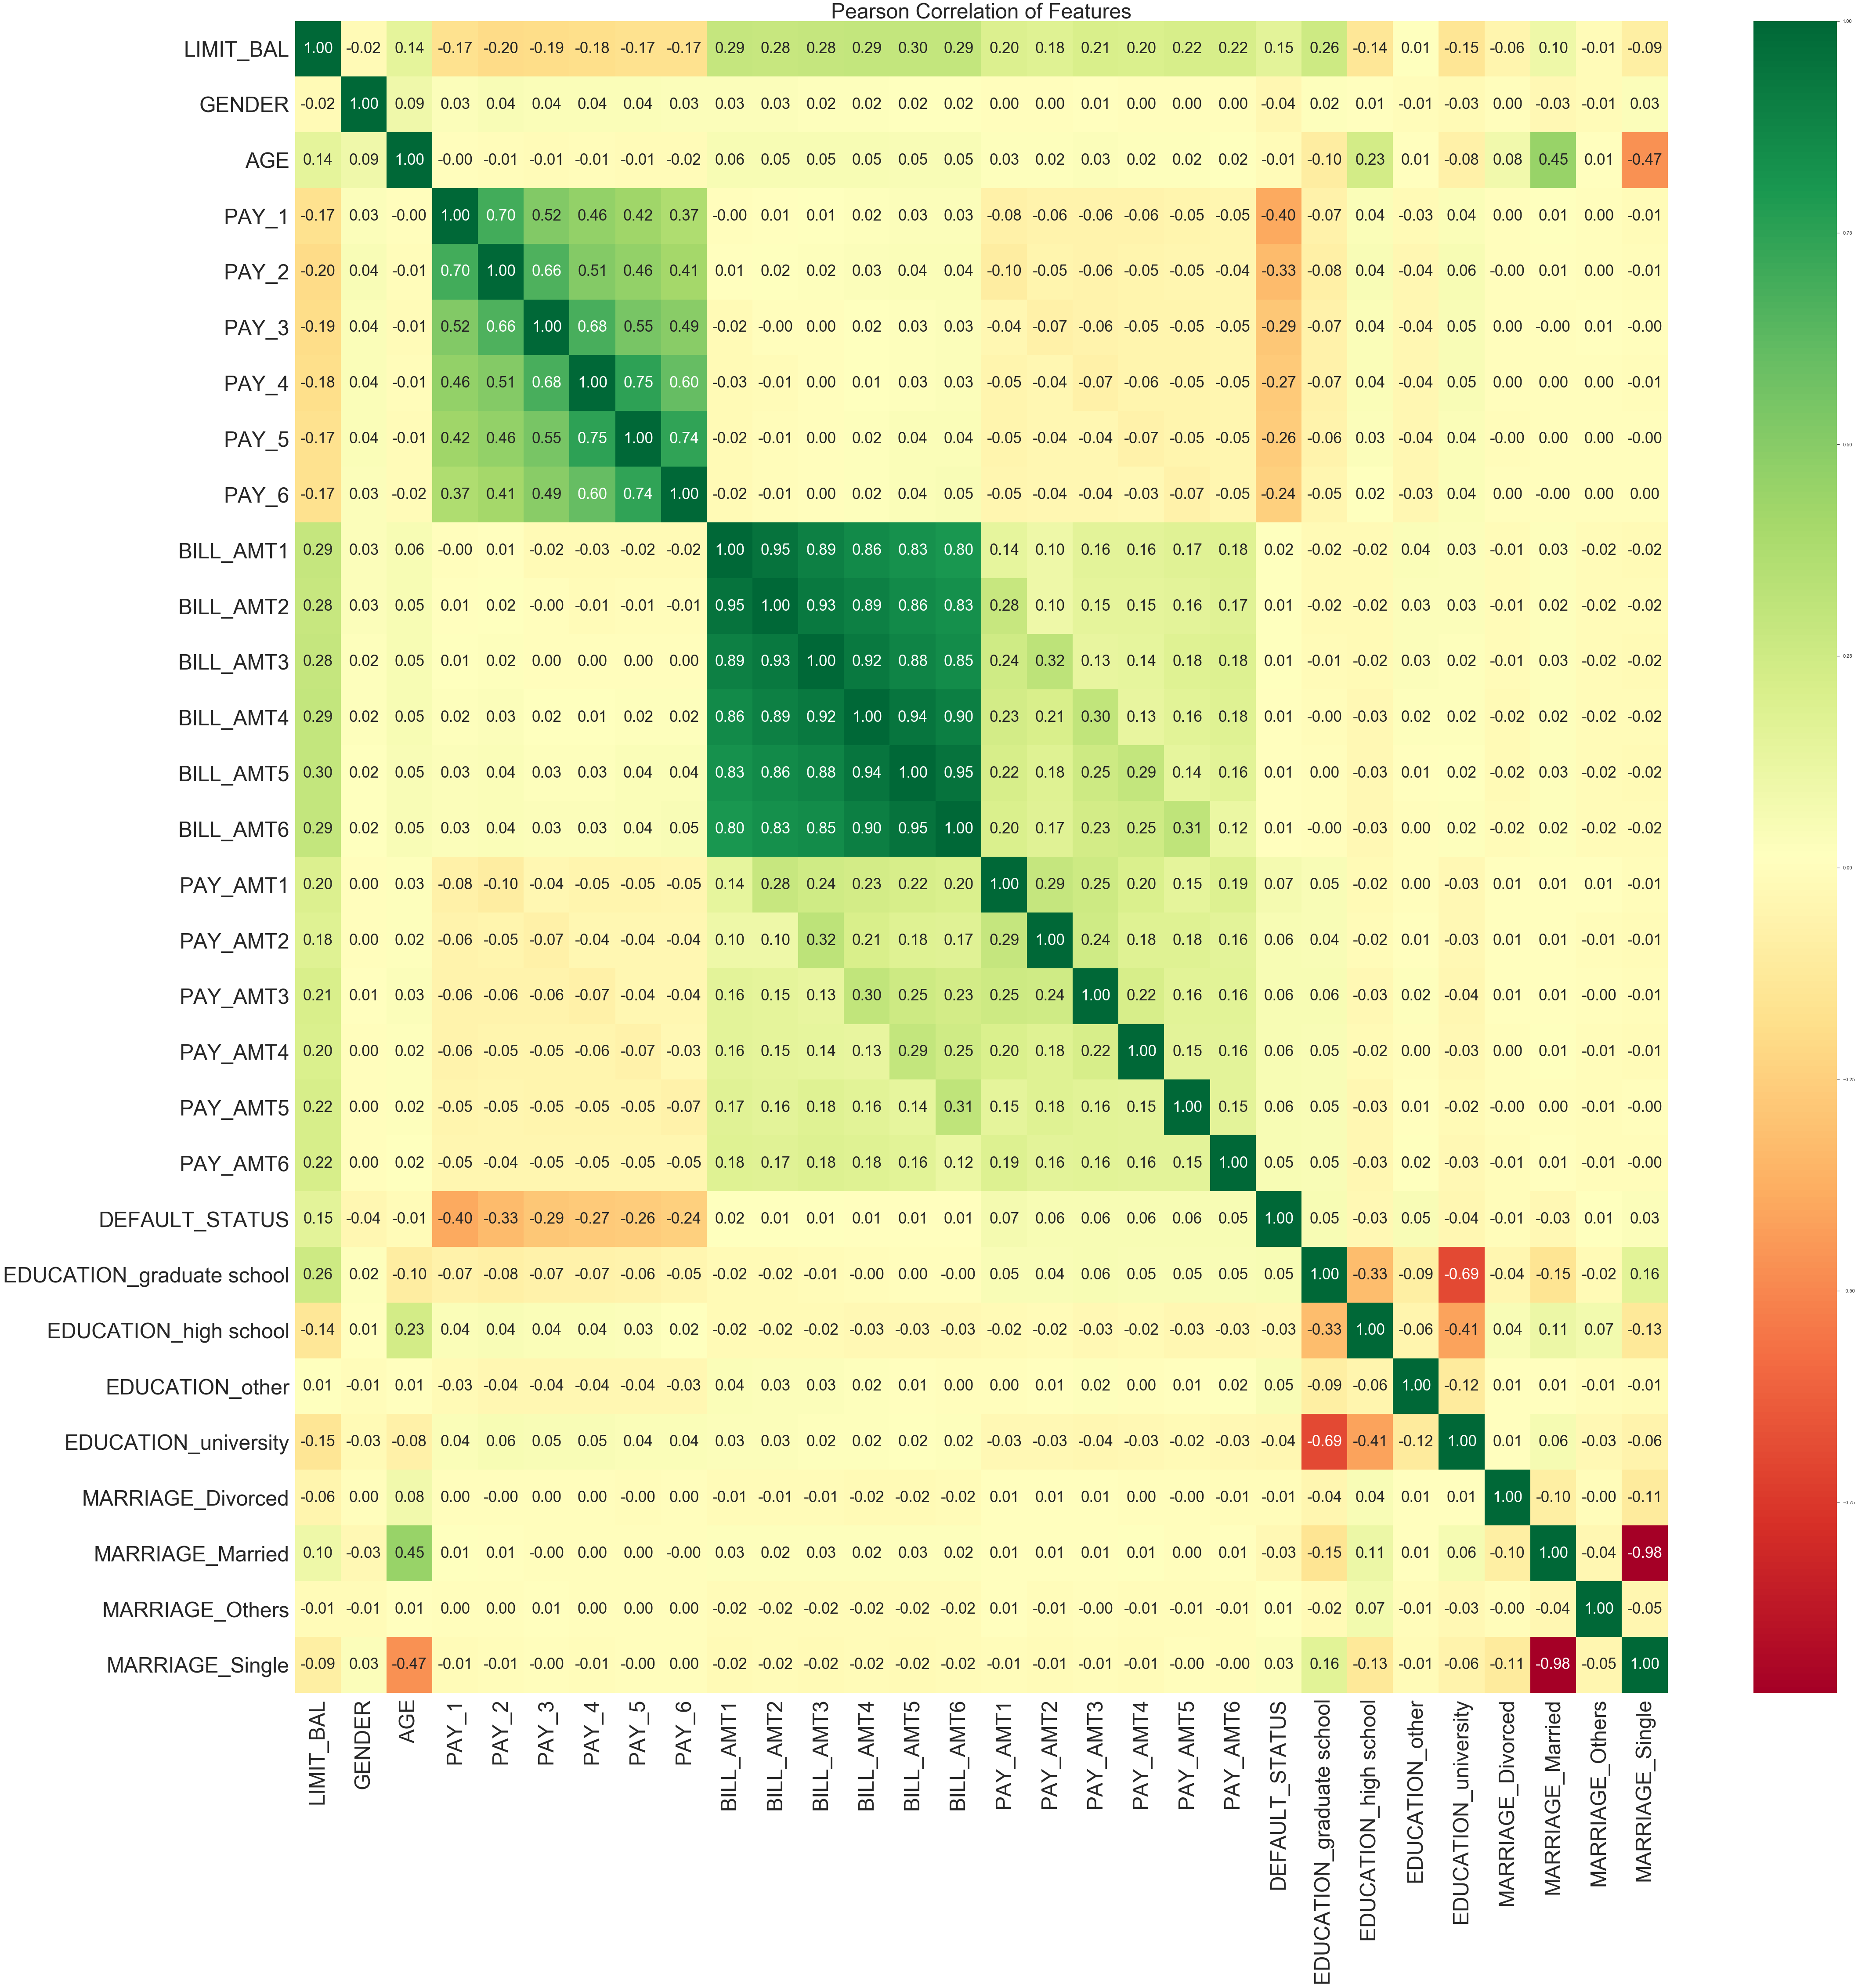

In [87]:
## Visualize the Correlation matrix

# Configure x and y axis
sns.set()
plt.figure(figsize=(70,70))
plt.xticks(fontsize=48)
plt.yticks(fontsize=48)
plt.title('Pearson Correlation of Features', size =48)

# Plotting the data using heatmap
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn",annot_kws={"size": 35},fmt=".2f")

## <span style='color:brown'>Correlation:

1. Repayment  status(PAY_1 to PAY_6) are highly correlated to each other
    
2. Bill amount (BILL_AMT1 to BILL_AMT6) are highly correlated to each other
    
3. DEFAULT_STATUS is correlated to Payment status (PAY_1 to PAY_6) and LIMIT_BAL
4. Payment amount( PAY_AMT1 to PAY_AMT6) are correlated to LIMIT_BAL
5. Bill amount (BILL_AMT1 to BILL_AMT6) are correlated to LIMIT_BAL
6. Bill amount is correlated to next month Payment amount (BILL_AMT6 to PAY_AMT5 and so on). BILL_AMT6 is Apr 2005 and PAY_AMT5 is May 2005
    
    

    
    

### Pairwise Correlation of all variables with LIMIT_BAL

In [88]:
Limit_bal_corr = corrmat.iloc[0,1:]

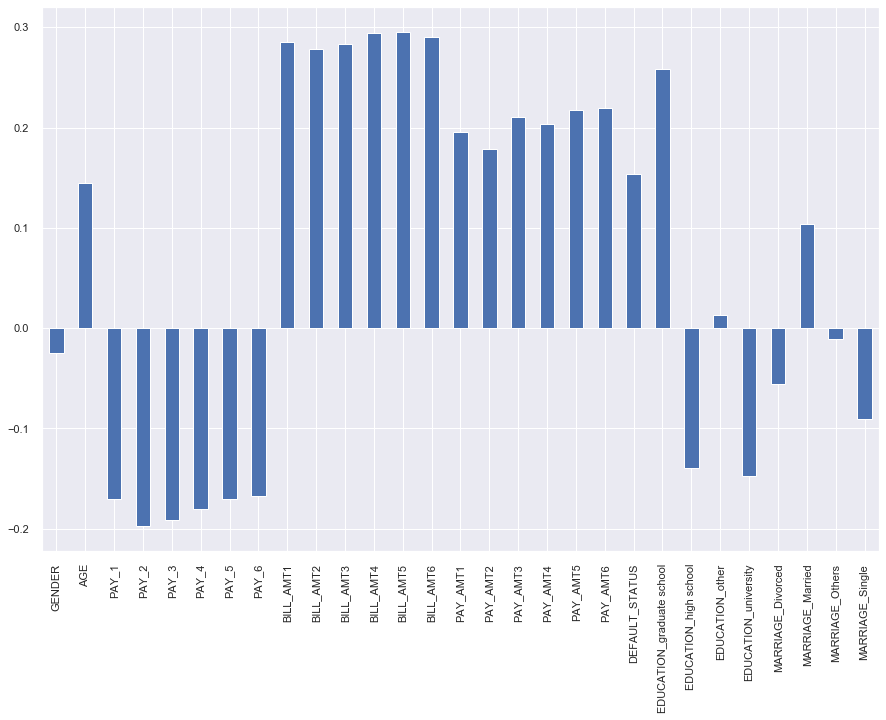

In [89]:
Limit_bal_corr.plot(kind='bar',figsize=(15,10))

#### GENDER, PAY_1 to PAY_6 columns,  EDUCATION_highschool, EDUCATION_university, MARRIAGE_divorced and MARRIAGE_Single have negative correlation/ low correlation with LIMIT_BAL

### The above columns should be removed before modeling

## <span style='background :yellow' > Summary of EDA:</span>

        

## <span style='color:brown'> Data Preprocessing:

1. There are 30,000 records and 25 variables
2. No nulls/ missing values/ duplicates
3. Renamed the columns that were inconsistent/ not user friendly - PAY_0, SEX, default payment next month are changed to PAY_1, GENDER, DEFAULT_STATUS
4. Irrelevant column with column name 'ID' is dropped
5. Categorical columns of object data types (Gender, Education, Default_status) were one hot encoded to change into numerical columns for modeling
6. PAY_1 to PAY_6 – Values -2 and -1 are replaced with 0 as -2: No consumption and -1: Paid in full and 0- Revolving credit are all good from business point of view




## <span style='color:brown'> Data Insights:

1. Out of 30,000 Customers, 23,364 are not default and only 6636 Customers (22.12%) default.
2. 60% of the Customers are female.
3. 53.2% of the Customers are Single and 45% are married.
4. Number of University graduated Customers are more
5. 50% of the Customers are below 34 years and 72% of the Customers are below 40 years
6. 25% of the Customers have credit limit less than 50,000 ,16% of the Customers have a credit limit over 50,000 and less than 100,000 and 26.2% have Credit limit over 100k-200k.  Overall, 50% of the Customers have credit limit less than 140k
7. Almost 50% of the Customers have 0 (Revolving credit) as the latest repayment status
8. 50% of the Customers have the latest outstanding bill amount of 22,381NT$
    


## <span style='color:brown'> Who are the customers that default?

1. 20.7% of Female Customers default and 24.1% of male Customers default
            
2. 26% of divorced Customers, 23.4% of married Customers and 20.9% of Single Customers default    
  
3. 25% of high school graduates, 23% of University graduates, 19.2% graduate school customers default
    
4. 33.33% of Customers between 71-80 default followed by 61-70, 51-60 etc.
    
5. 20-30 age group has the most number of default customers
    
6. 31.7% of Customers with Credit limit less than 50k default.
    
7. There are more number of default customers with credit limit less than 50k    
    
8. If latest payment status (PAY_1) value=0, they are more likely to be non default

9. If payment status is >2, they are mostly default (more than 50% of customers)
    
10. 87% of the Customers who have payment_status as 0 are not default

## <span style='color:brown'> Relationship of LIMIT_BAL with other variables

LIMIT_BAL:

Credit limit is discretized for EDA . 25.5% of the customers have credit limit less than 50k$, 16% have credit limit between 51-100K.

1. DEFAULT_STATUS

    Lower credit range 0-50k have higher number of defaulters- almost 36.7% of the total defaulters, 51-100k credit range has 18.7% of the total defaulters
    

2. GENDER 

  Number of female customers is more than male customers in each credit range. Both Female and male default more at lower credit limit- almost 31% 
  

3. MARRIAGE
 
 Single customers are more under 200k credit limit. Married customers default more than Single customers across all credit ranges. They all default more at lower credit (for example, 35% of married customers under 50k default whereas only 20%  151-200k$ credit range default.


4. EDUCATION 

    Number of high school customers decreases as the credit limit increases. University graduates are more under 200K$ credit limit. Graduate school customers are more over 200k credit range. All the customers default more at lower credit limit (For example, 34% of high school graduates under 50K credit range default whereas only 16% of high school in 151-200k credit range default.


5.  AGE

     Customers aged 21-30 are more under 150K credit limit whereas customers aged 31-40 are more over 150k credit limit. Number of customers between 21-30 decreases as the credit limit increases. Age 71-80 defaults the most at higher credit limit
     
